## Импортируем необходимые зависимости

In [34]:
import sys
sys.path.append("../")

from src.characteristics import calculate_max_deg, calculate_size_mis
from src.distributions import skewnormal_distribution, normal_distribution
from src.utils import build_knn_graph, build_dist_graph, generate_h, generate_a

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

## 1. Исследование поведения числовой характеристики $T$ в зависимости от параметров $\nu$ и $\theta$ с фикисированными размерами выборки и параметрами процедуры построения графа

### 1.1 Исследование характеристики $\Delta(G)$ на $\tau^{knn}$ с фиксированными параметрами построения графа

Выборка размера $n$ = 100, параметр $k$ = 5 и $N$ = 1000 итераций метода Монте-Карло

In [46]:
n = 100 # Размер выборки
k = 5 # Параметр для графа ближайших соседей
N = 1000 # Количество итераций для метода Монте-Карло

### 1.1.1 Распределение SkewNormal($\alpha$) - стандартное нормальное распределение со смещением $\alpha$

In [33]:
alphas = [0.001, 0.01, 0.1, 0.5, 0.75, 1, 3, 5, 10, 15, 20, 50, 100, 500, 1000]
avg_max_degs = []

100%|██████████| 15/15 [01:57<00:00,  7.81s/it]


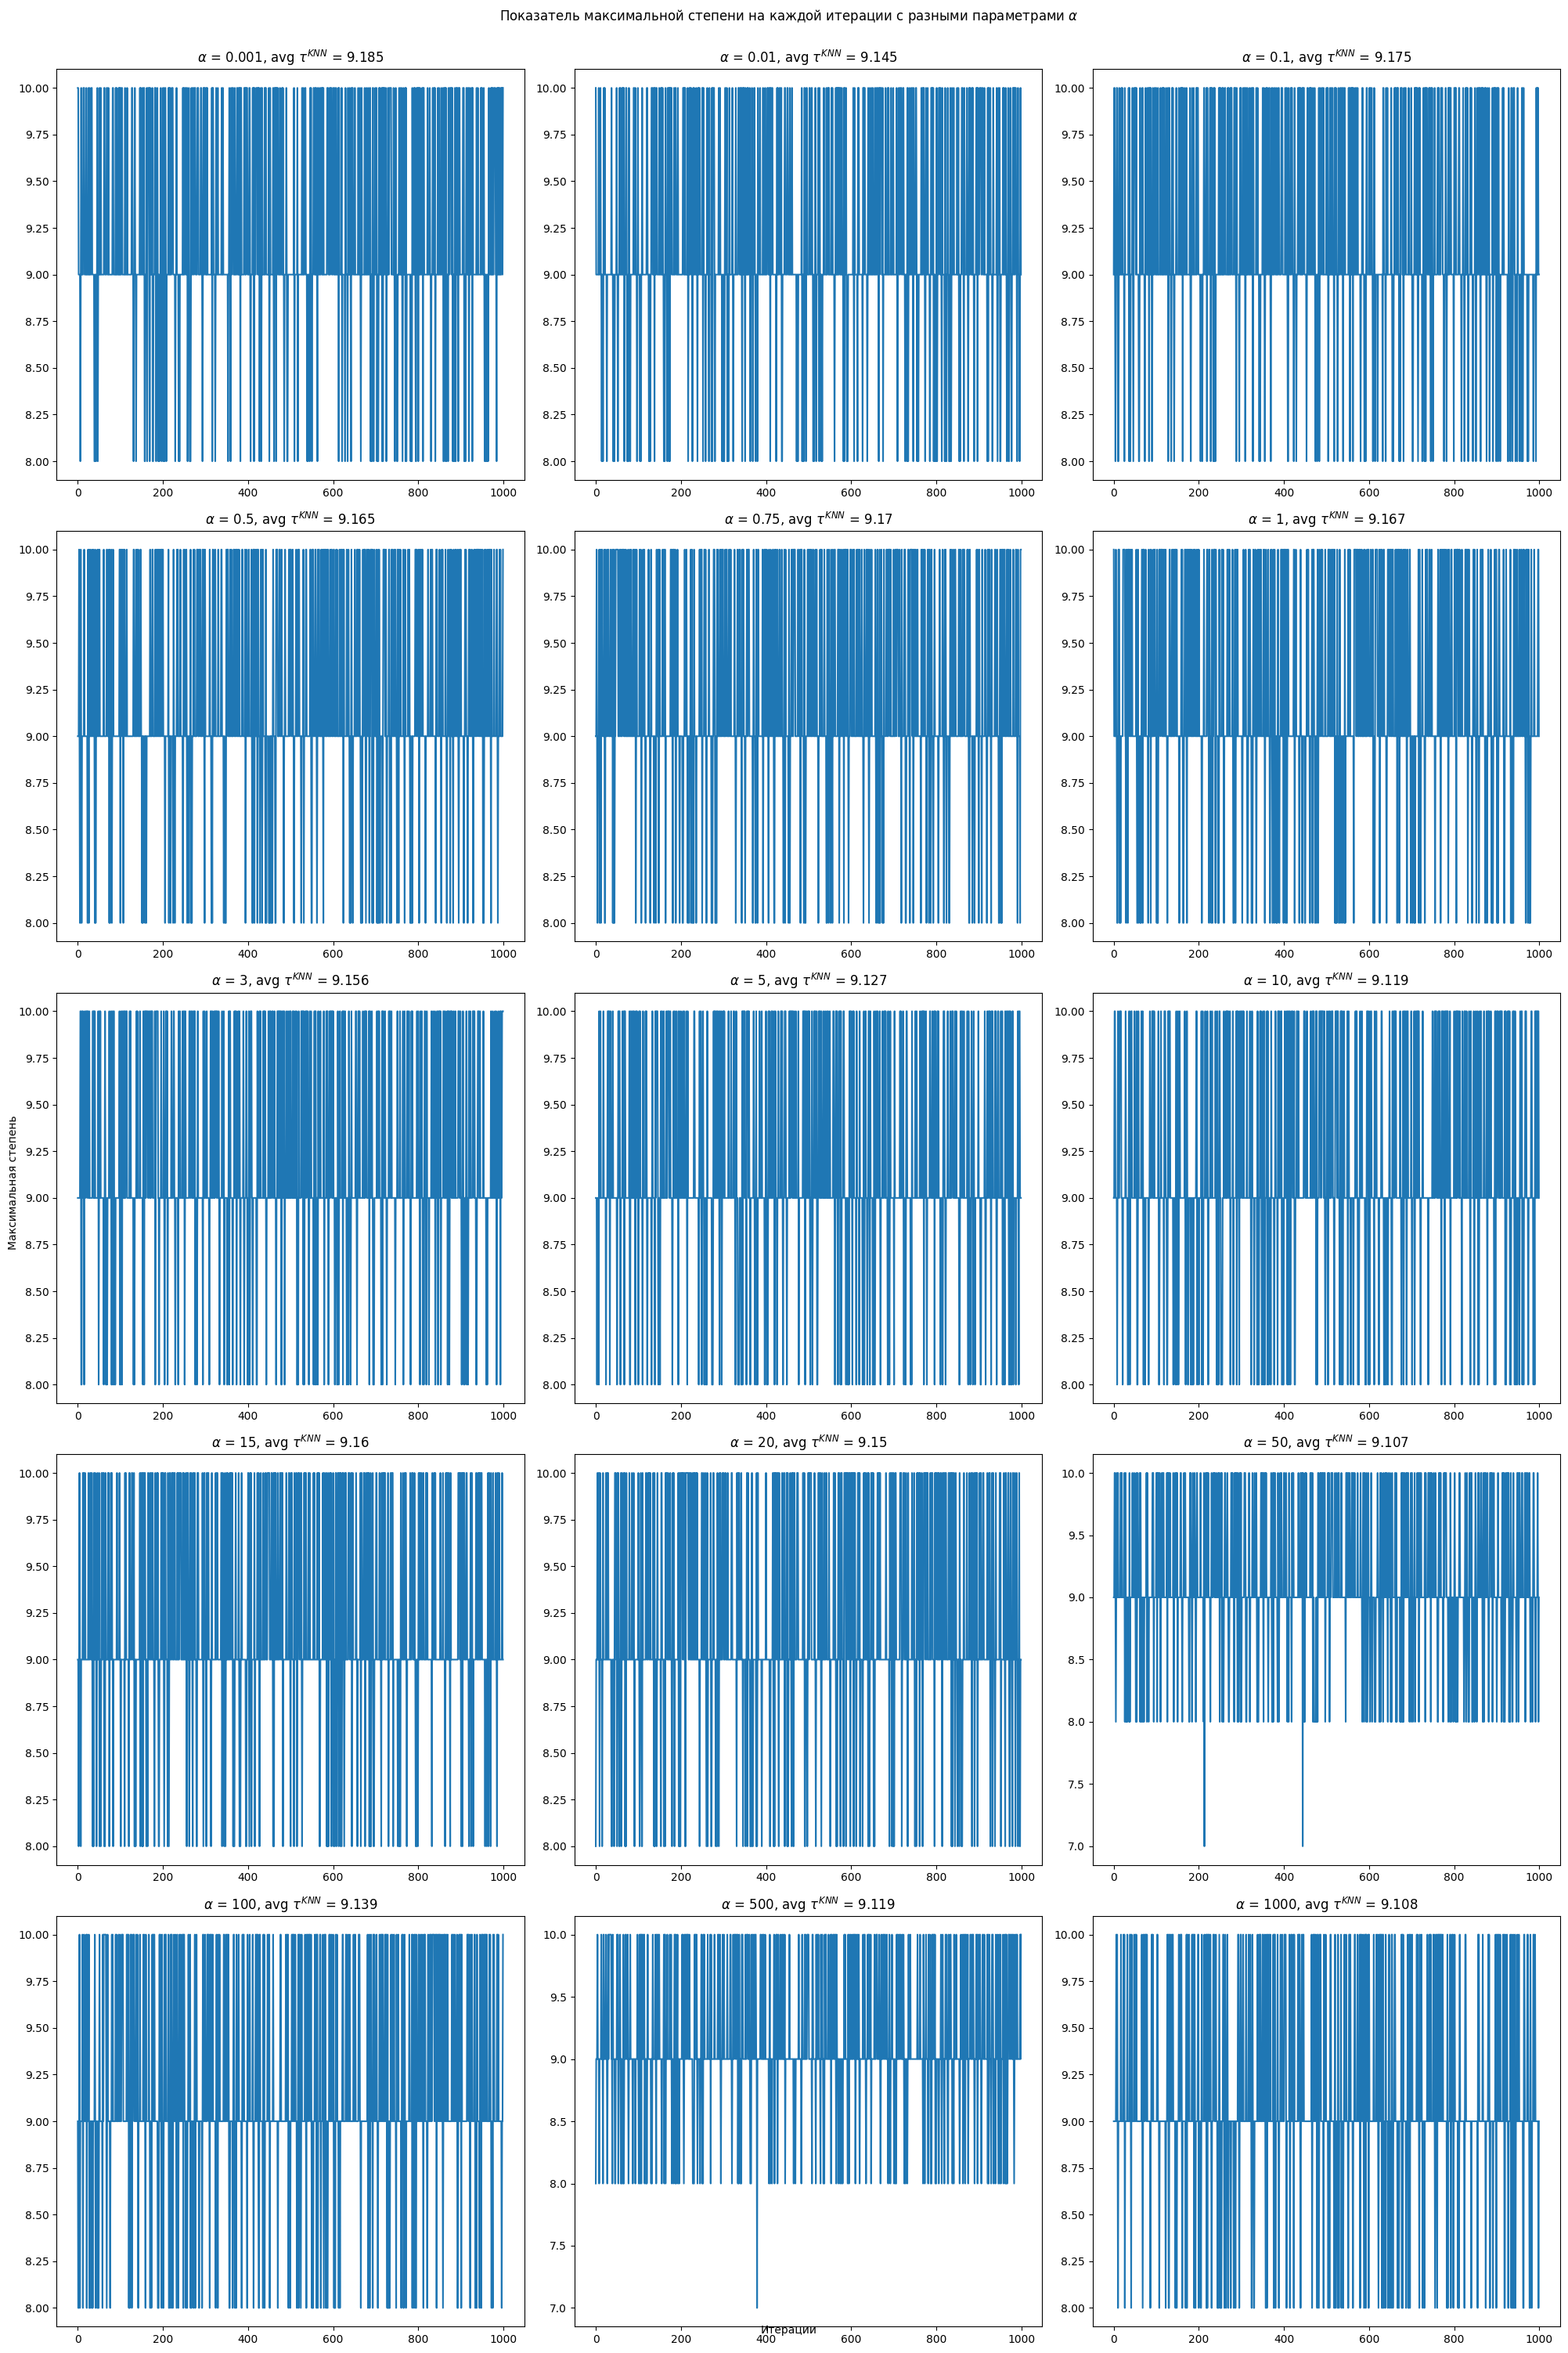

In [ ]:
figure, axis = plt.subplots(nrows=5, ncols=3, figsize=(20, 30))

for i, alpha in enumerate(tqdm(alphas)):
    max_degs = []
    
    for _ in range(N):
        random_sample = skewnormal_distribution(alpha, n)
        graph = build_knn_graph(random_sample, k)
        max_deg = calculate_max_deg(graph)
        
        max_degs.append(max_deg)
    
    avg_max_deg = sum(max_degs) / N
    avg_max_degs.append(avg_max_deg)
    
    axis[i//3][i%3].plot(list(range(N)), max_degs)
    axis[i//3][i%3].set_title(f"$\\alpha$ = {alpha}, avg $\\tau^{{KNN}}$ = {avg_max_deg}")

plt.suptitle("Показатель максимальной степени на каждой итерации с разными параметрами $\\alpha$", y=1)

figure.text(0.5, 0.01, 'Итерации', ha='center')
figure.text(0.001, 0.5, 'Максимальная степень', va='center', rotation='vertical')
figure.tight_layout()

plt.show()

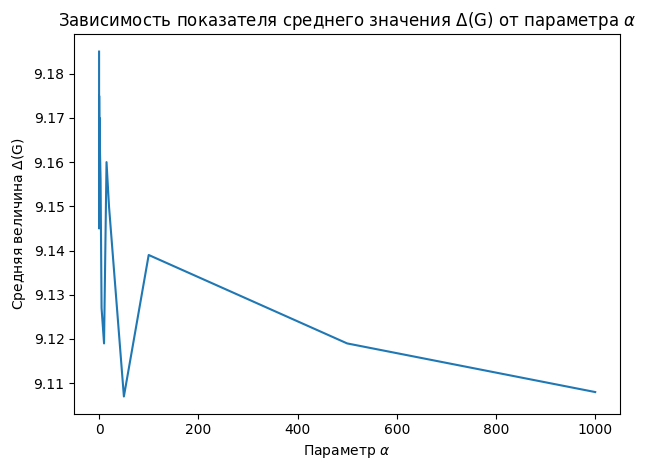

In [37]:
plt.plot(alphas, avg_max_degs)
plt.title("Зависимость показателя среднего значения $\\Delta$(G) от параметра $\\alpha$")
plt.xlabel("Параметр $\\alpha$")
plt.ylabel("Средняя величина $\\Delta$(G)")
plt.tight_layout()

Можем заметить, что при любом параметре $\alpha$, в среднем, максимальная степень равна 9 и чем больше величина параметра $\alpha$, тем ближе максимальная степень приближается к 9

### 1.1.2 Распределение Normal(0, $\sigma$) - нормальное распределение с дисперсией $\sigma$

In [51]:
sigmas = [0.001, 0.01, 0.1, 0.5, 0.75, 1, 3, 5, 10, 15, 20, 50, 100, 500, 1000]
avg_max_degs = [] 

100%|██████████| 15/15 [01:50<00:00,  7.36s/it]


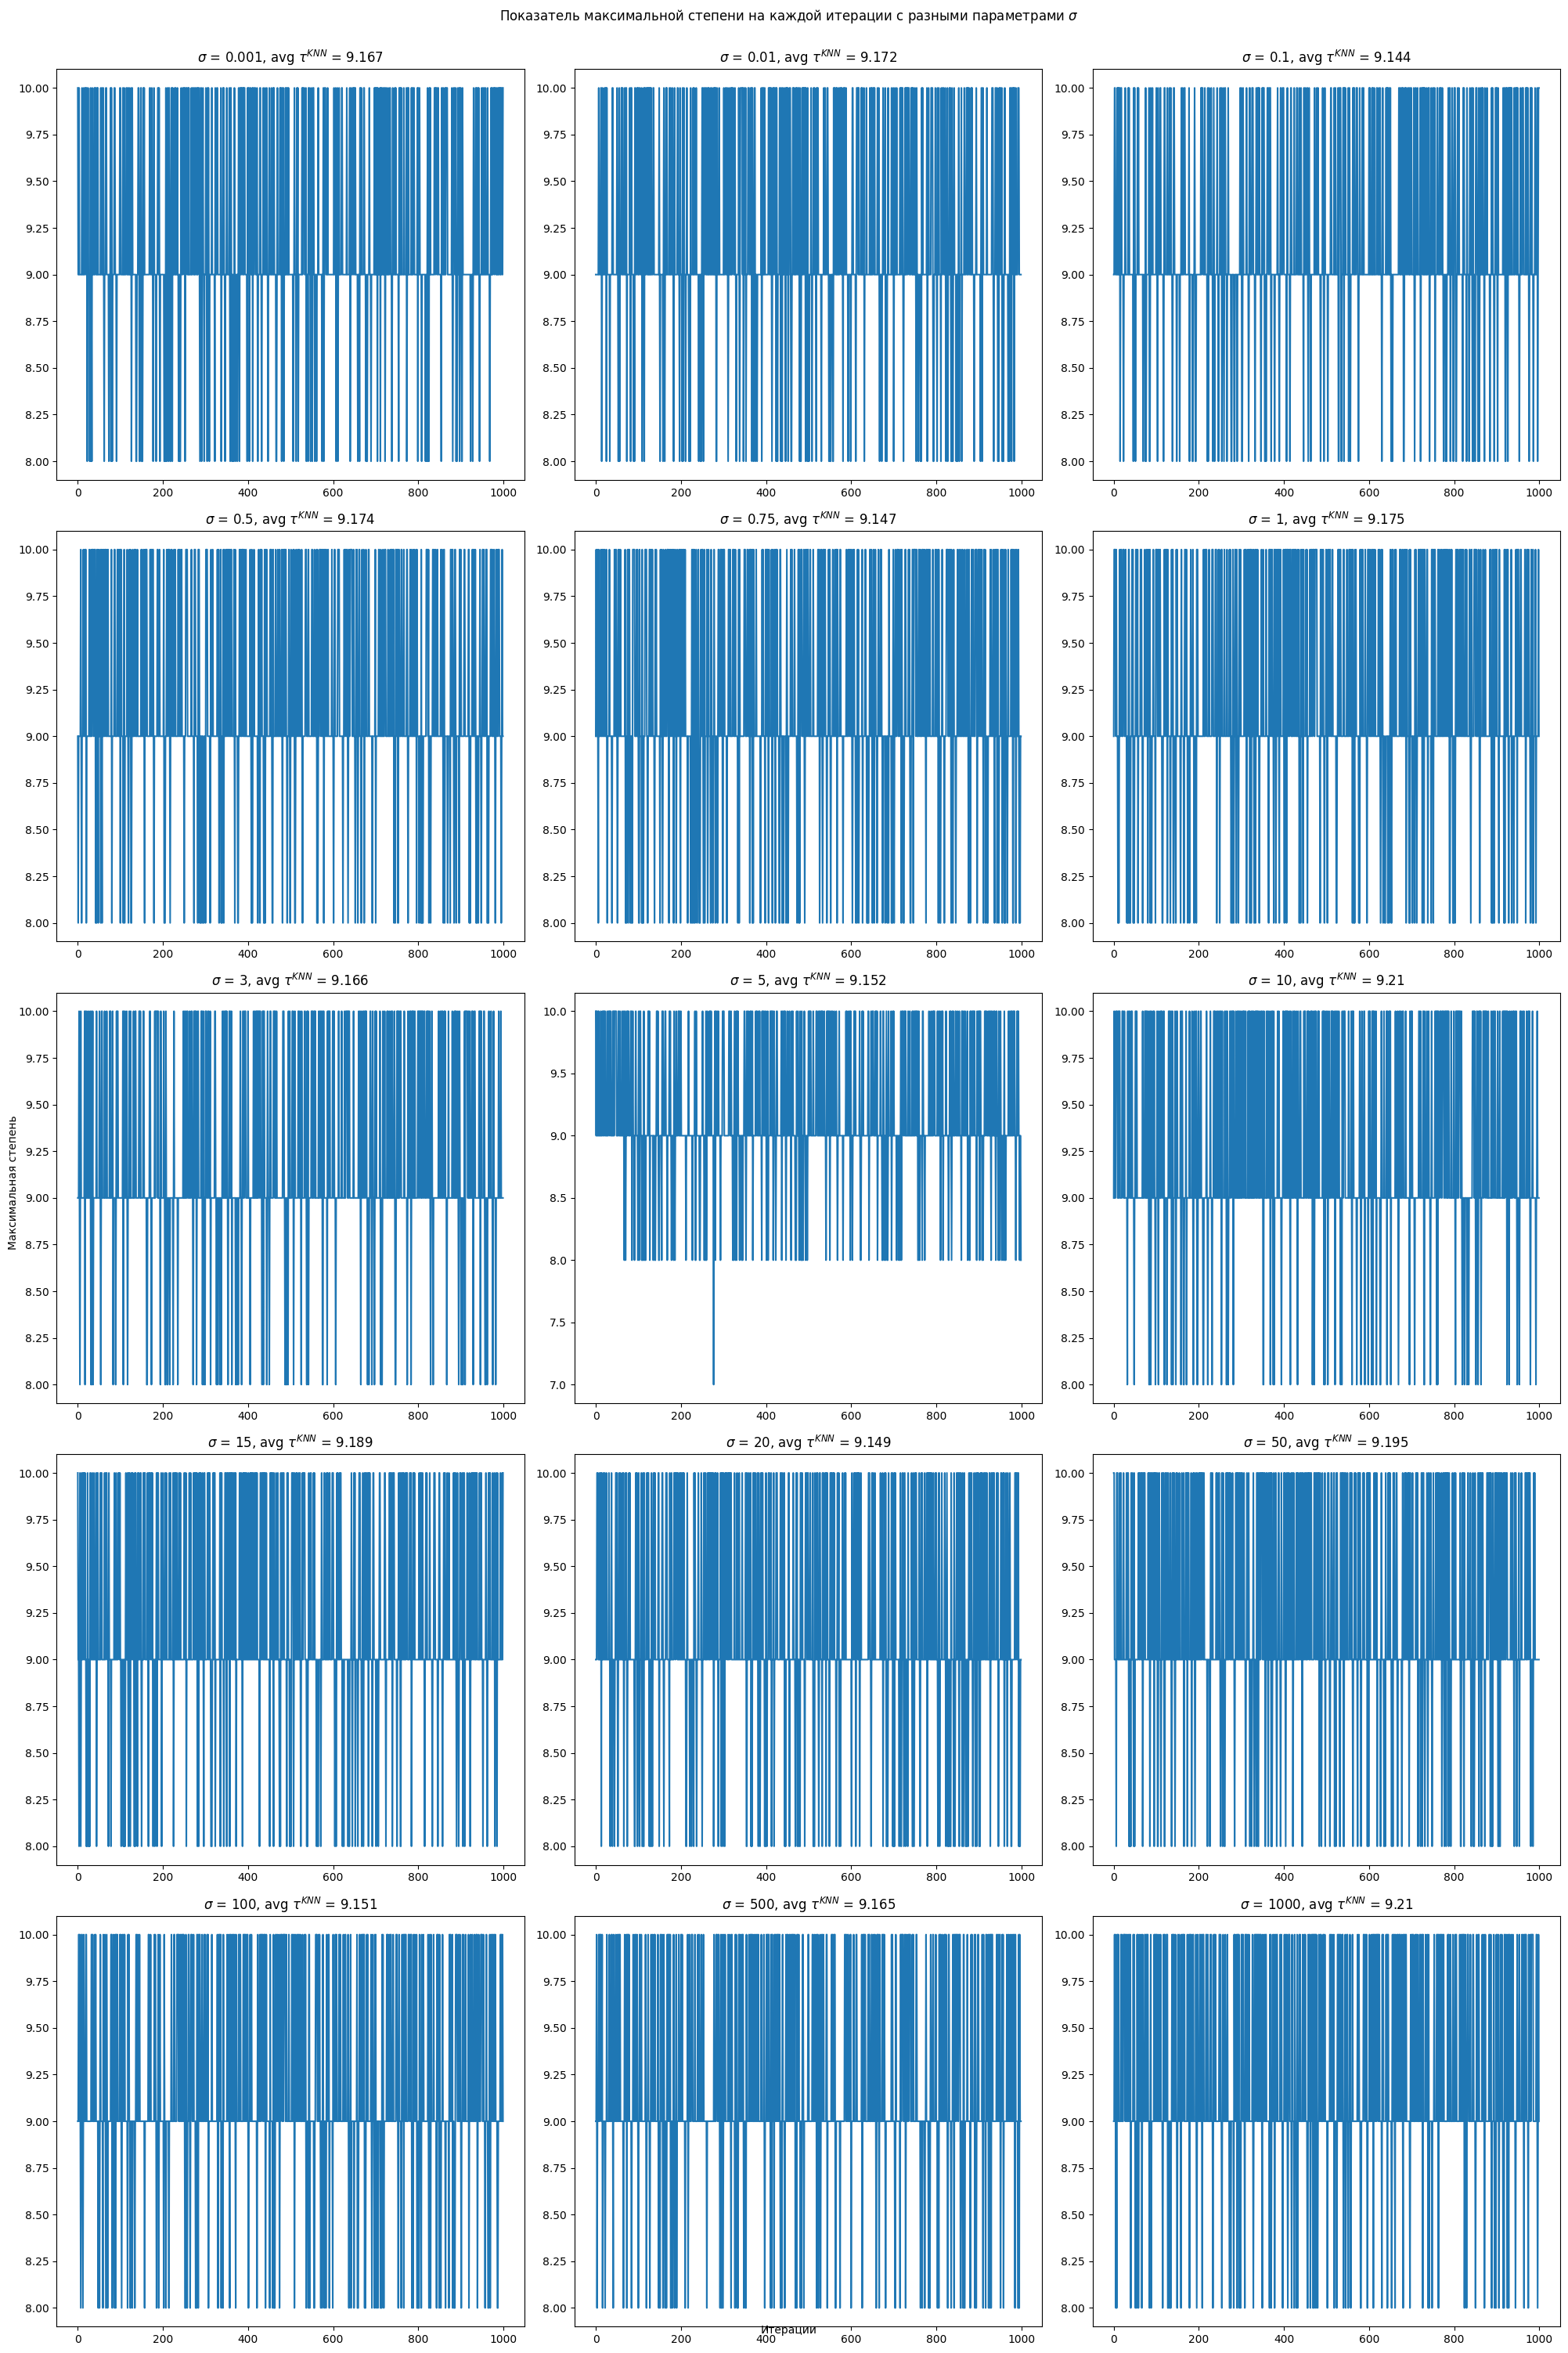

In [52]:
figure, axis = plt.subplots(nrows=5, ncols=3, figsize=(20, 30))

for i, sigma in enumerate(tqdm(sigmas)):
    max_degs = []
    
    for _ in range(N):
        random_sample = normal_distribution(sigma, n)
        graph = build_knn_graph(random_sample, k)
        max_deg = calculate_max_deg(graph)
        
        max_degs.append(max_deg)
    
    avg_max_deg = sum(max_degs) / N
    avg_max_degs.append(avg_max_deg)
    
    axis[i//3][i%3].plot(list(range(N)), max_degs)
    axis[i//3][i%3].set_title(f"$\\sigma$ = {sigma}, avg $\\tau^{{KNN}}$ = {avg_max_deg}")

plt.suptitle("Показатель максимальной степени на каждой итерации с разными параметрами $\\sigma$", y=1)

figure.text(0.5, 0.01, 'Итерации', ha='center')
figure.text(0.001, 0.5, 'Максимальная степень', va='center', rotation='vertical')
figure.tight_layout()

plt.show()

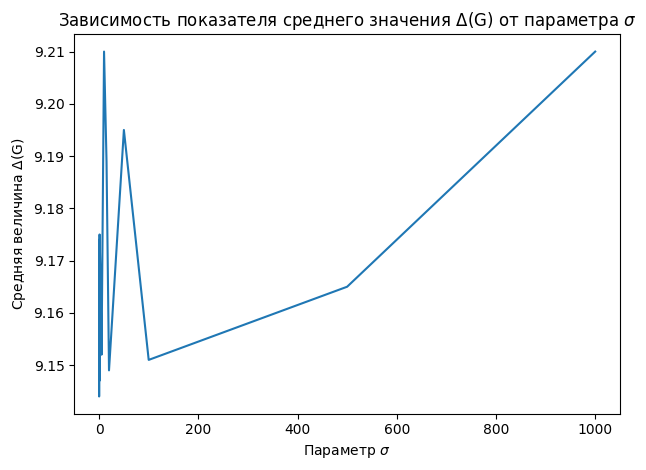

In [53]:
plt.plot(sigmas, avg_max_degs)
plt.title("Зависимость показателя среднего значения $\\Delta$(G) от параметра $\\sigma$")
plt.xlabel("Параметр $\\sigma$")
plt.ylabel("Средняя величина $\\Delta$(G)")
plt.tight_layout()

Наблюдаем обратную картину, т.е. с увеличением параметра $\sigma$ растет и среднее значение $\Delta(G)$

### 1.2 Исследование характеристики $\alpha(G)$ на $\tau^{dist}$ с фиксированными параметрами построения графа

Выборка размера $n$ = 100, параметр $dist$ = 1 и $N$ = 1000 итераций метода Монте-Карло

In [60]:
n = 100 # Размер выборки
dist = 1 # Параметр для дистанционного графа
N = 1000 # Количество итераций для метода Монте-Карло

### 1.2.1 Распределение SkewNormal($\alpha$) - стандартное нормальное распределение со смещением $\alpha$

In [65]:
alphas = [0.001, 0.01, 0.1, 0.5, 0.75, 1, 3, 5, 10, 15, 20, 50, 100, 500, 1000, 10000, 150_000, 300_000, 500_000, 15_000_000]
avg_mis_sizes = []

100%|██████████| 20/20 [01:11<00:00,  3.56s/it]


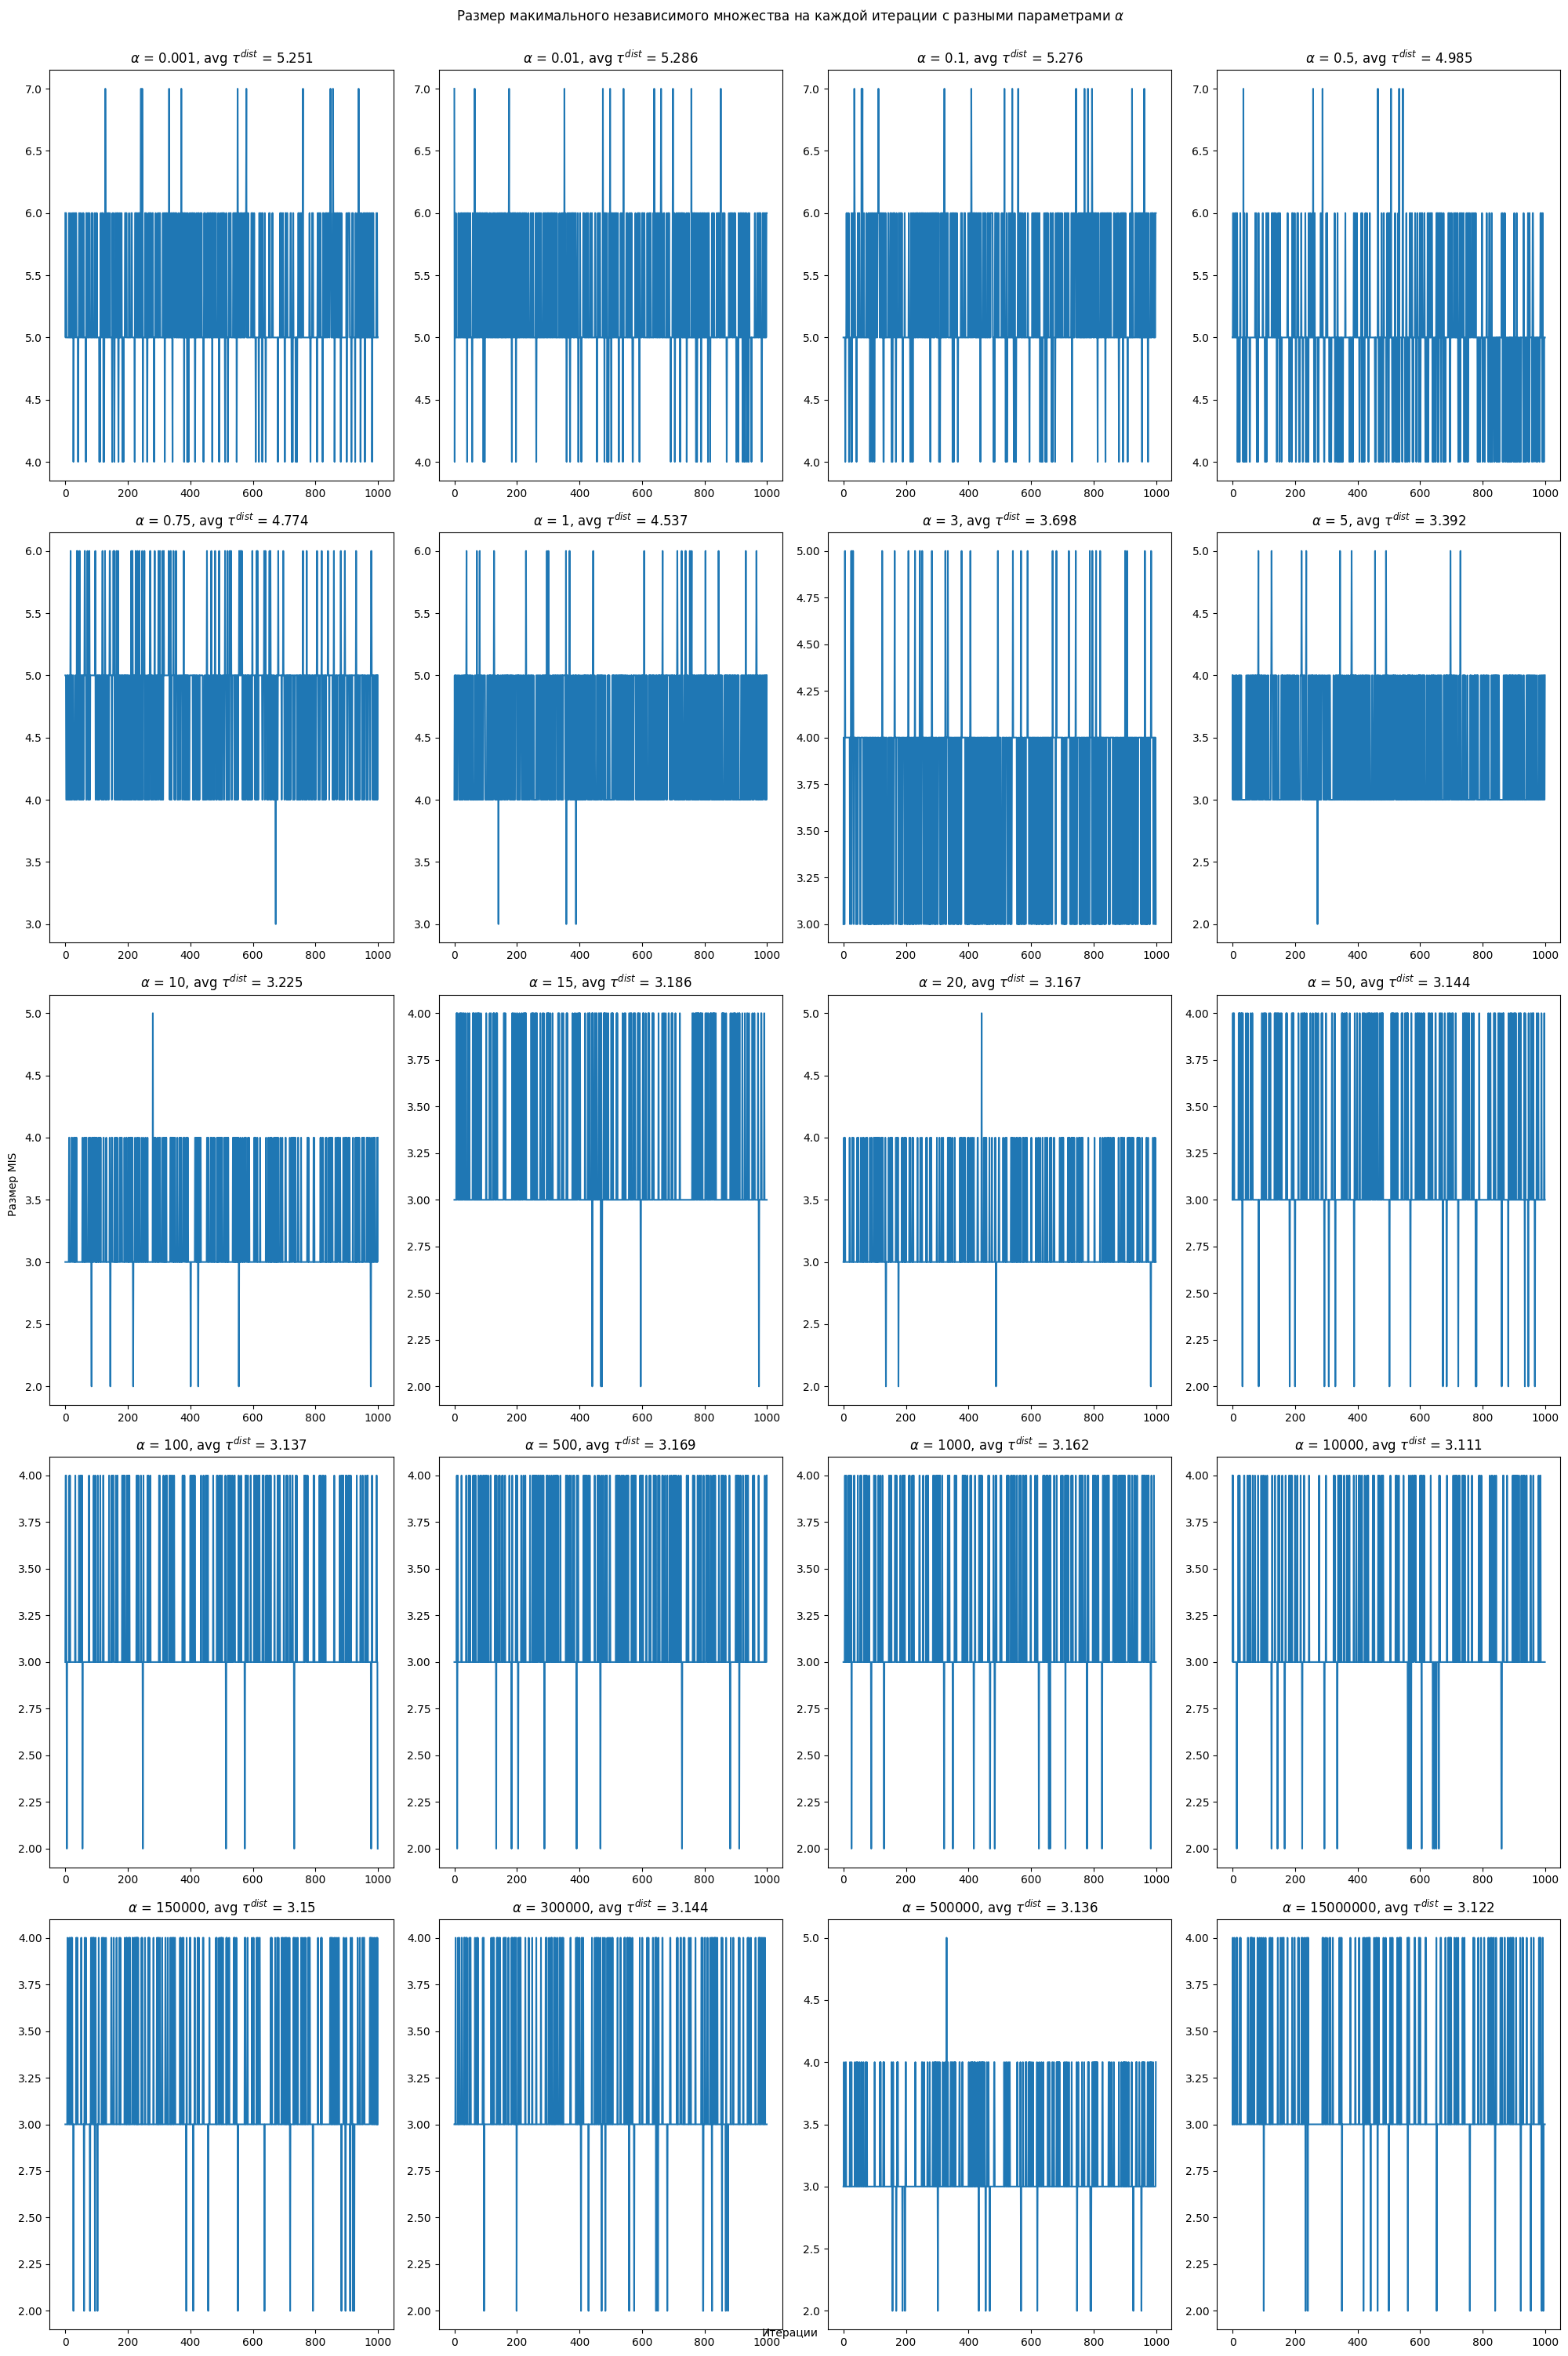

In [66]:
figure, axis = plt.subplots(nrows=5, ncols=4, figsize=(20, 30))

for i, alpha in enumerate(tqdm(alphas)):
    mis_sizes = []
    
    for _ in range(N):
        random_sample = skewnormal_distribution(alpha, n)
        graph = build_dist_graph(random_sample, dist)
        mis_size = calculate_size_mis(graph)
        
        mis_sizes.append(mis_size)
    
    avg_mis_size = sum(mis_sizes) / N
    avg_mis_sizes.append(avg_mis_size)
    
    axis[i//4][i%4].plot(list(range(N)), mis_sizes)
    axis[i//4][i%4].set_title(f"$\\alpha$ = {alpha}, avg $\\tau^{{dist}}$ = {avg_mis_size}")

plt.suptitle("Размер макимального независимого множества на каждой итерации с разными параметрами $\\alpha$", y=1)

figure.text(0.5, 0.01, 'Итерации', ha='center')
figure.text(0.001, 0.5, 'Размер MIS', va='center', rotation='vertical')
figure.tight_layout()

plt.show()

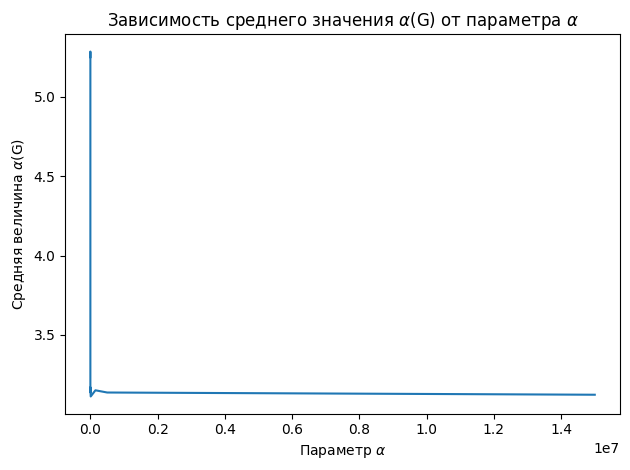

In [67]:
plt.plot(alphas, avg_mis_sizes)
plt.title("Зависимость среднего значения $\\alpha$(G) от параметра $\\alpha$")
plt.xlabel("Параметр $\\alpha$")
plt.ylabel("Средняя величина $\\alpha$(G)")
plt.tight_layout()

### 1.2.2 Распределение Normal(0, $\sigma$) - нормальное распределение с дисперсией $\sigma$

In [68]:
sigmas = [0.001, 0.01, 0.1, 0.5, 0.75, 1, 3, 5, 10, 15, 20, 50, 100, 500, 1000, 10000, 150_000, 300_000, 500_000, 15_000_000]
avg_mis_sizes = []

100%|██████████| 20/20 [04:01<00:00, 12.06s/it]


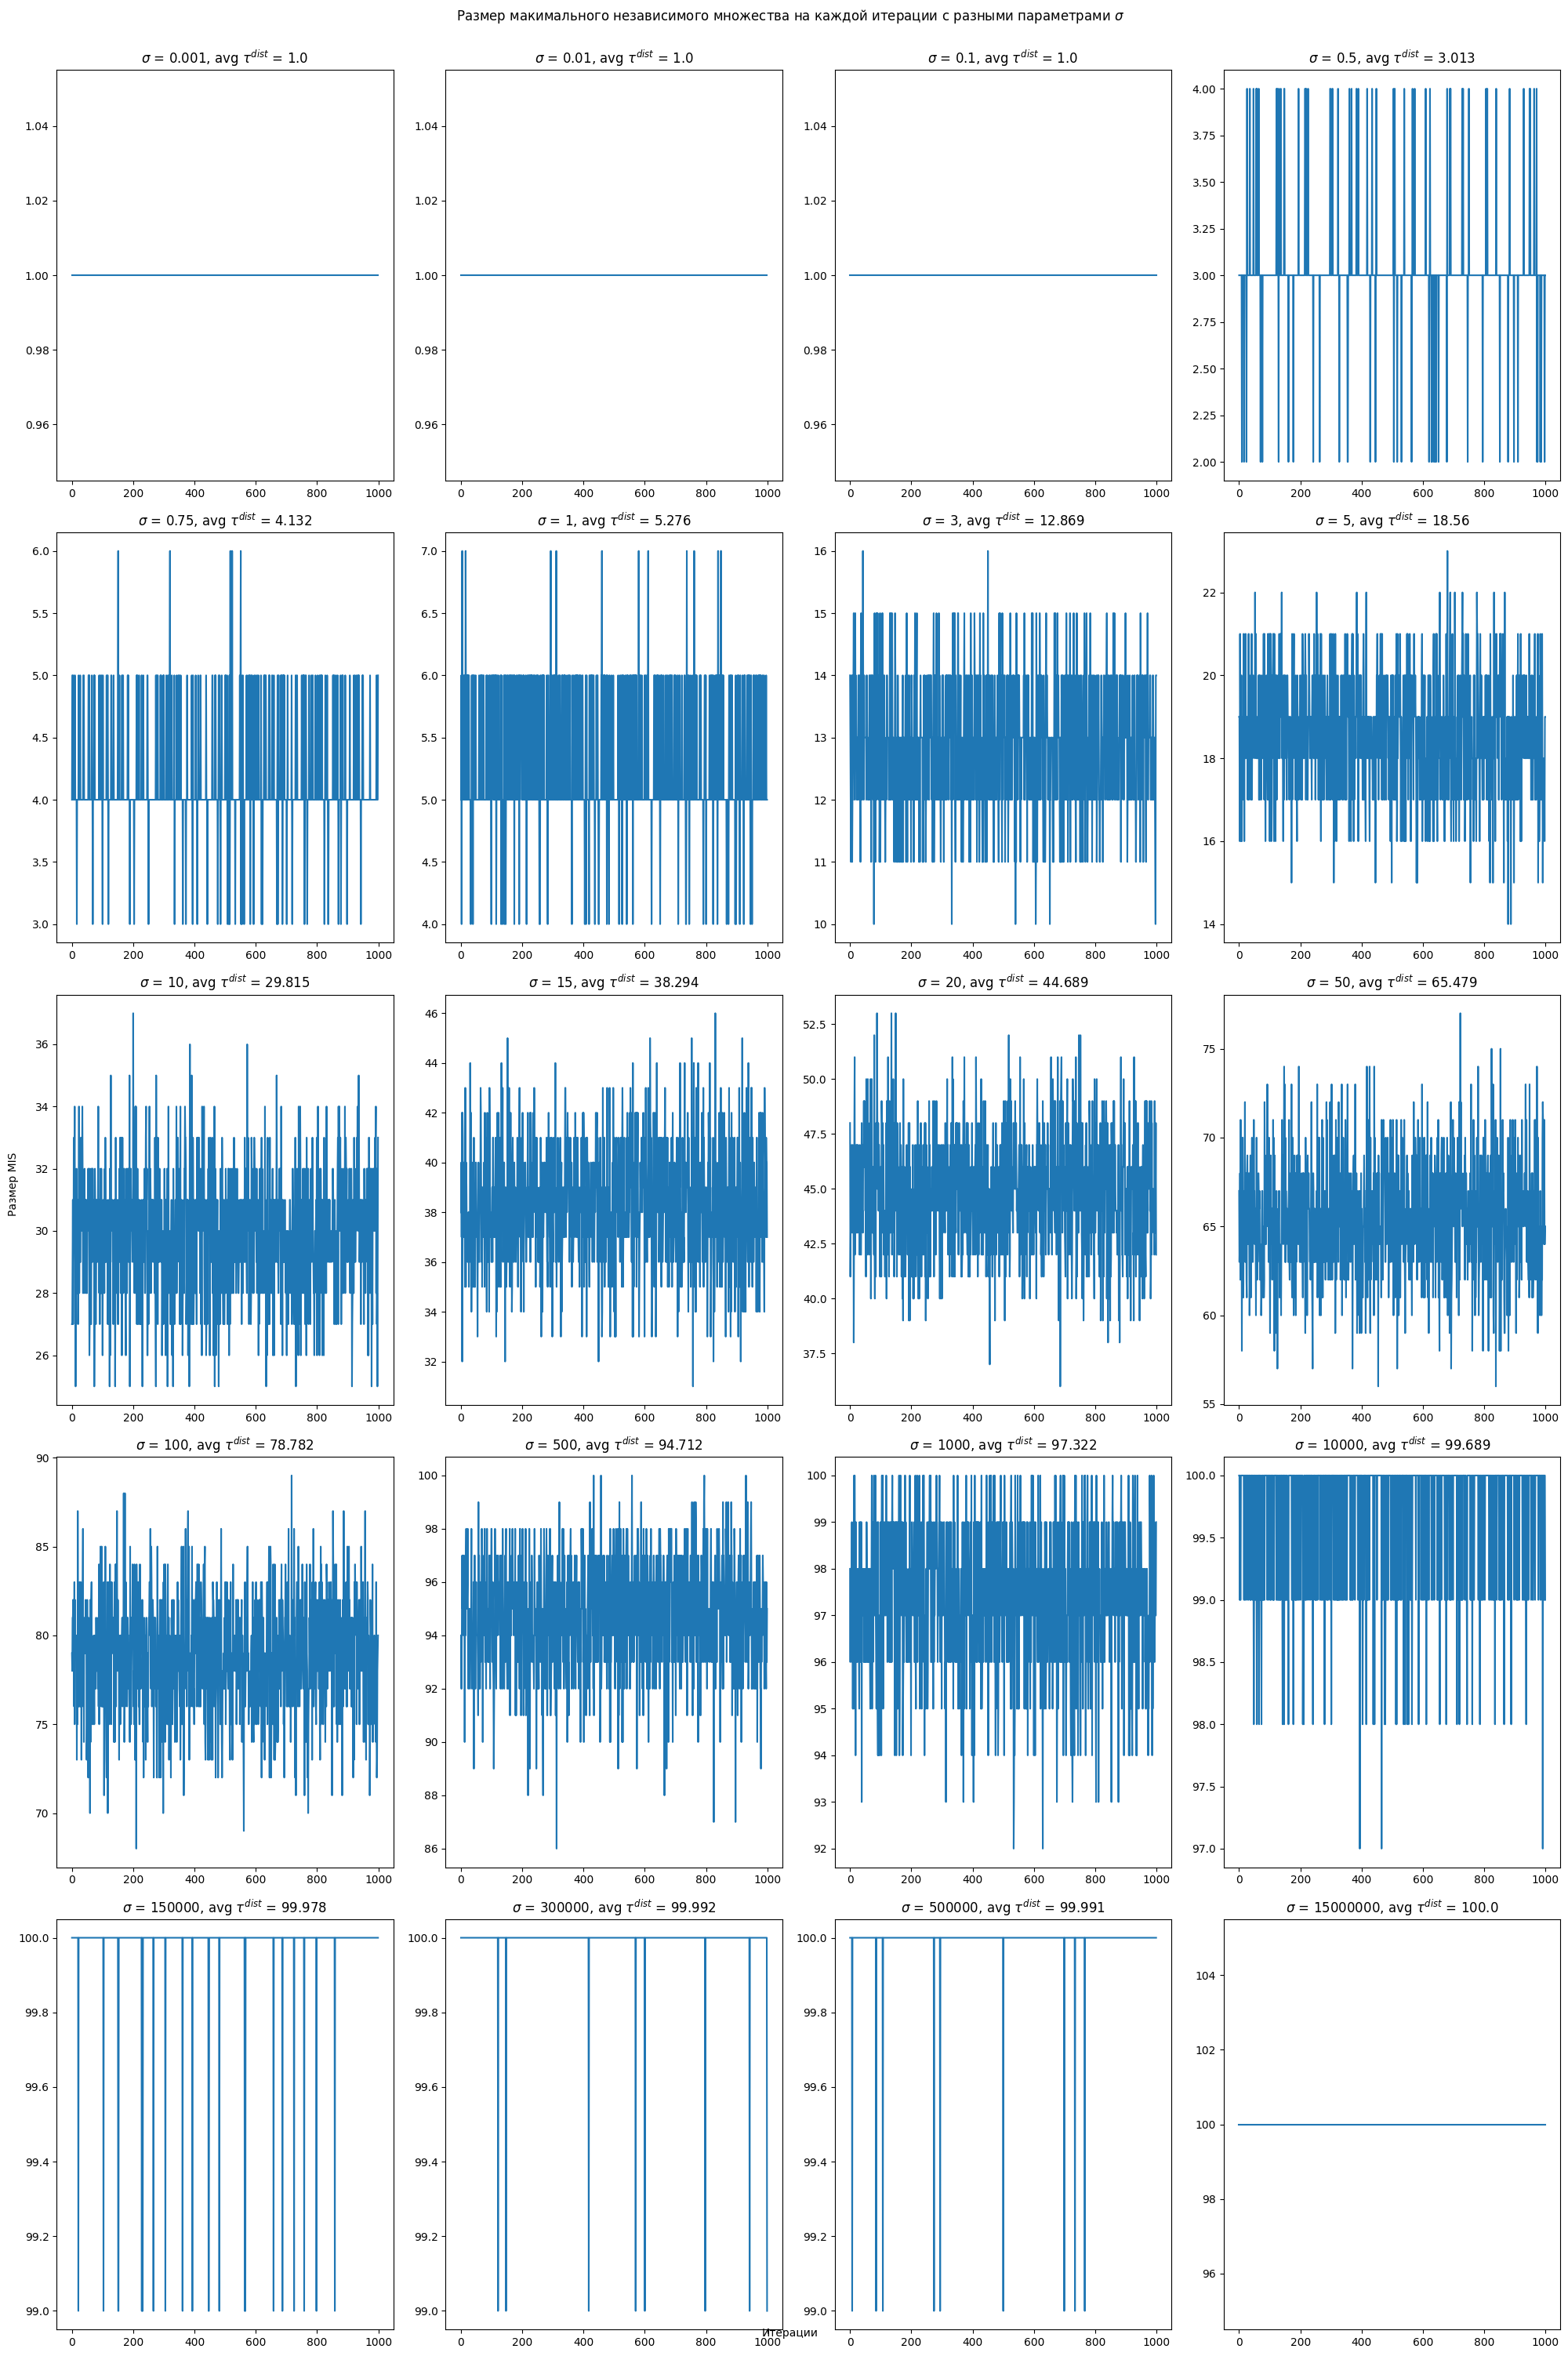

In [69]:
figure, axis = plt.subplots(nrows=5, ncols=4, figsize=(20, 30))

for i, sigma in enumerate(tqdm(sigmas)):
    mis_sizes = []
    
    for _ in range(N):
        random_sample = normal_distribution(sigma, n)
        graph = build_dist_graph(random_sample, dist)
        mis_size = calculate_size_mis(graph)
        
        mis_sizes.append(mis_size)
    
    avg_mis_size = sum(mis_sizes) / N
    avg_mis_sizes.append(avg_mis_size)
    
    axis[i//4][i%4].plot(list(range(N)), mis_sizes)
    axis[i//4][i%4].set_title(f"$\\sigma$ = {sigma}, avg $\\tau^{{dist}}$ = {avg_mis_size}")

plt.suptitle("Размер макимального независимого множества на каждой итерации с разными параметрами $\\sigma$", y=1)

figure.text(0.5, 0.01, 'Итерации', ha='center')
figure.text(0.001, 0.5, 'Размер MIS', va='center', rotation='vertical')
figure.tight_layout()

plt.show()

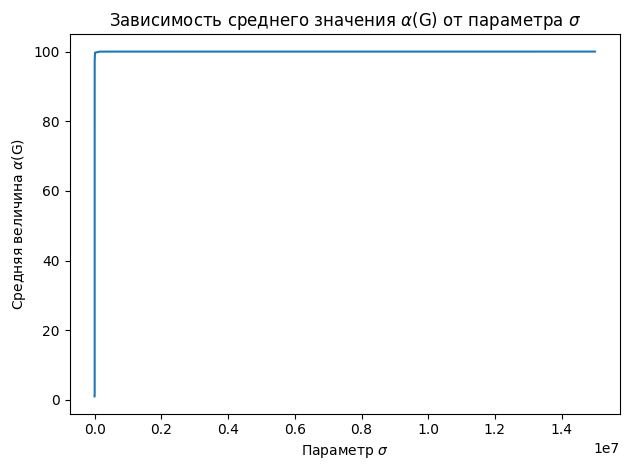

In [70]:
plt.plot(sigmas, avg_mis_sizes)
plt.title("Зависимость среднего значения $\\alpha$(G) от параметра $\\sigma$")
plt.xlabel("Параметр $\\sigma$")
plt.ylabel("Средняя величина $\\alpha$(G)")
plt.tight_layout()

Опять-таки в случае нормального распределения, с изменением параметров, наблюдается обратная картина -- с ростом дисперсии растет и максимальное множество независимых вершин.

Так же, можно заметить, что при $\alpha \to 0$, $\alpha(G)_{\alpha} \to \alpha(G)_{\sigma=1}$ 

## 2. Исследование поведения числовой характеристика $T$ в зависимости от параметров процедуры построения графа и размера выборки при фиксированных значениях $\theta$ = $\theta_0$ и $\nu$ = $\nu_0$

### 2.1 Исследование характеристики $\Delta(G)$ на $\tau^{knn}$ с фиксированными параметрами распределения

In [79]:
n_samples = [1, 5, 10, 25, 50, 100, 300]
k_neighbours = [1, 3, 5, 7, 9, 15, 20]
N = 1000

### 2.1.1 Распределение SkewNoraml($\alpha_0$), где $\alpha_0 = 1$

100%|██████████| 7/7 [12:53<00:00, 110.54s/it]


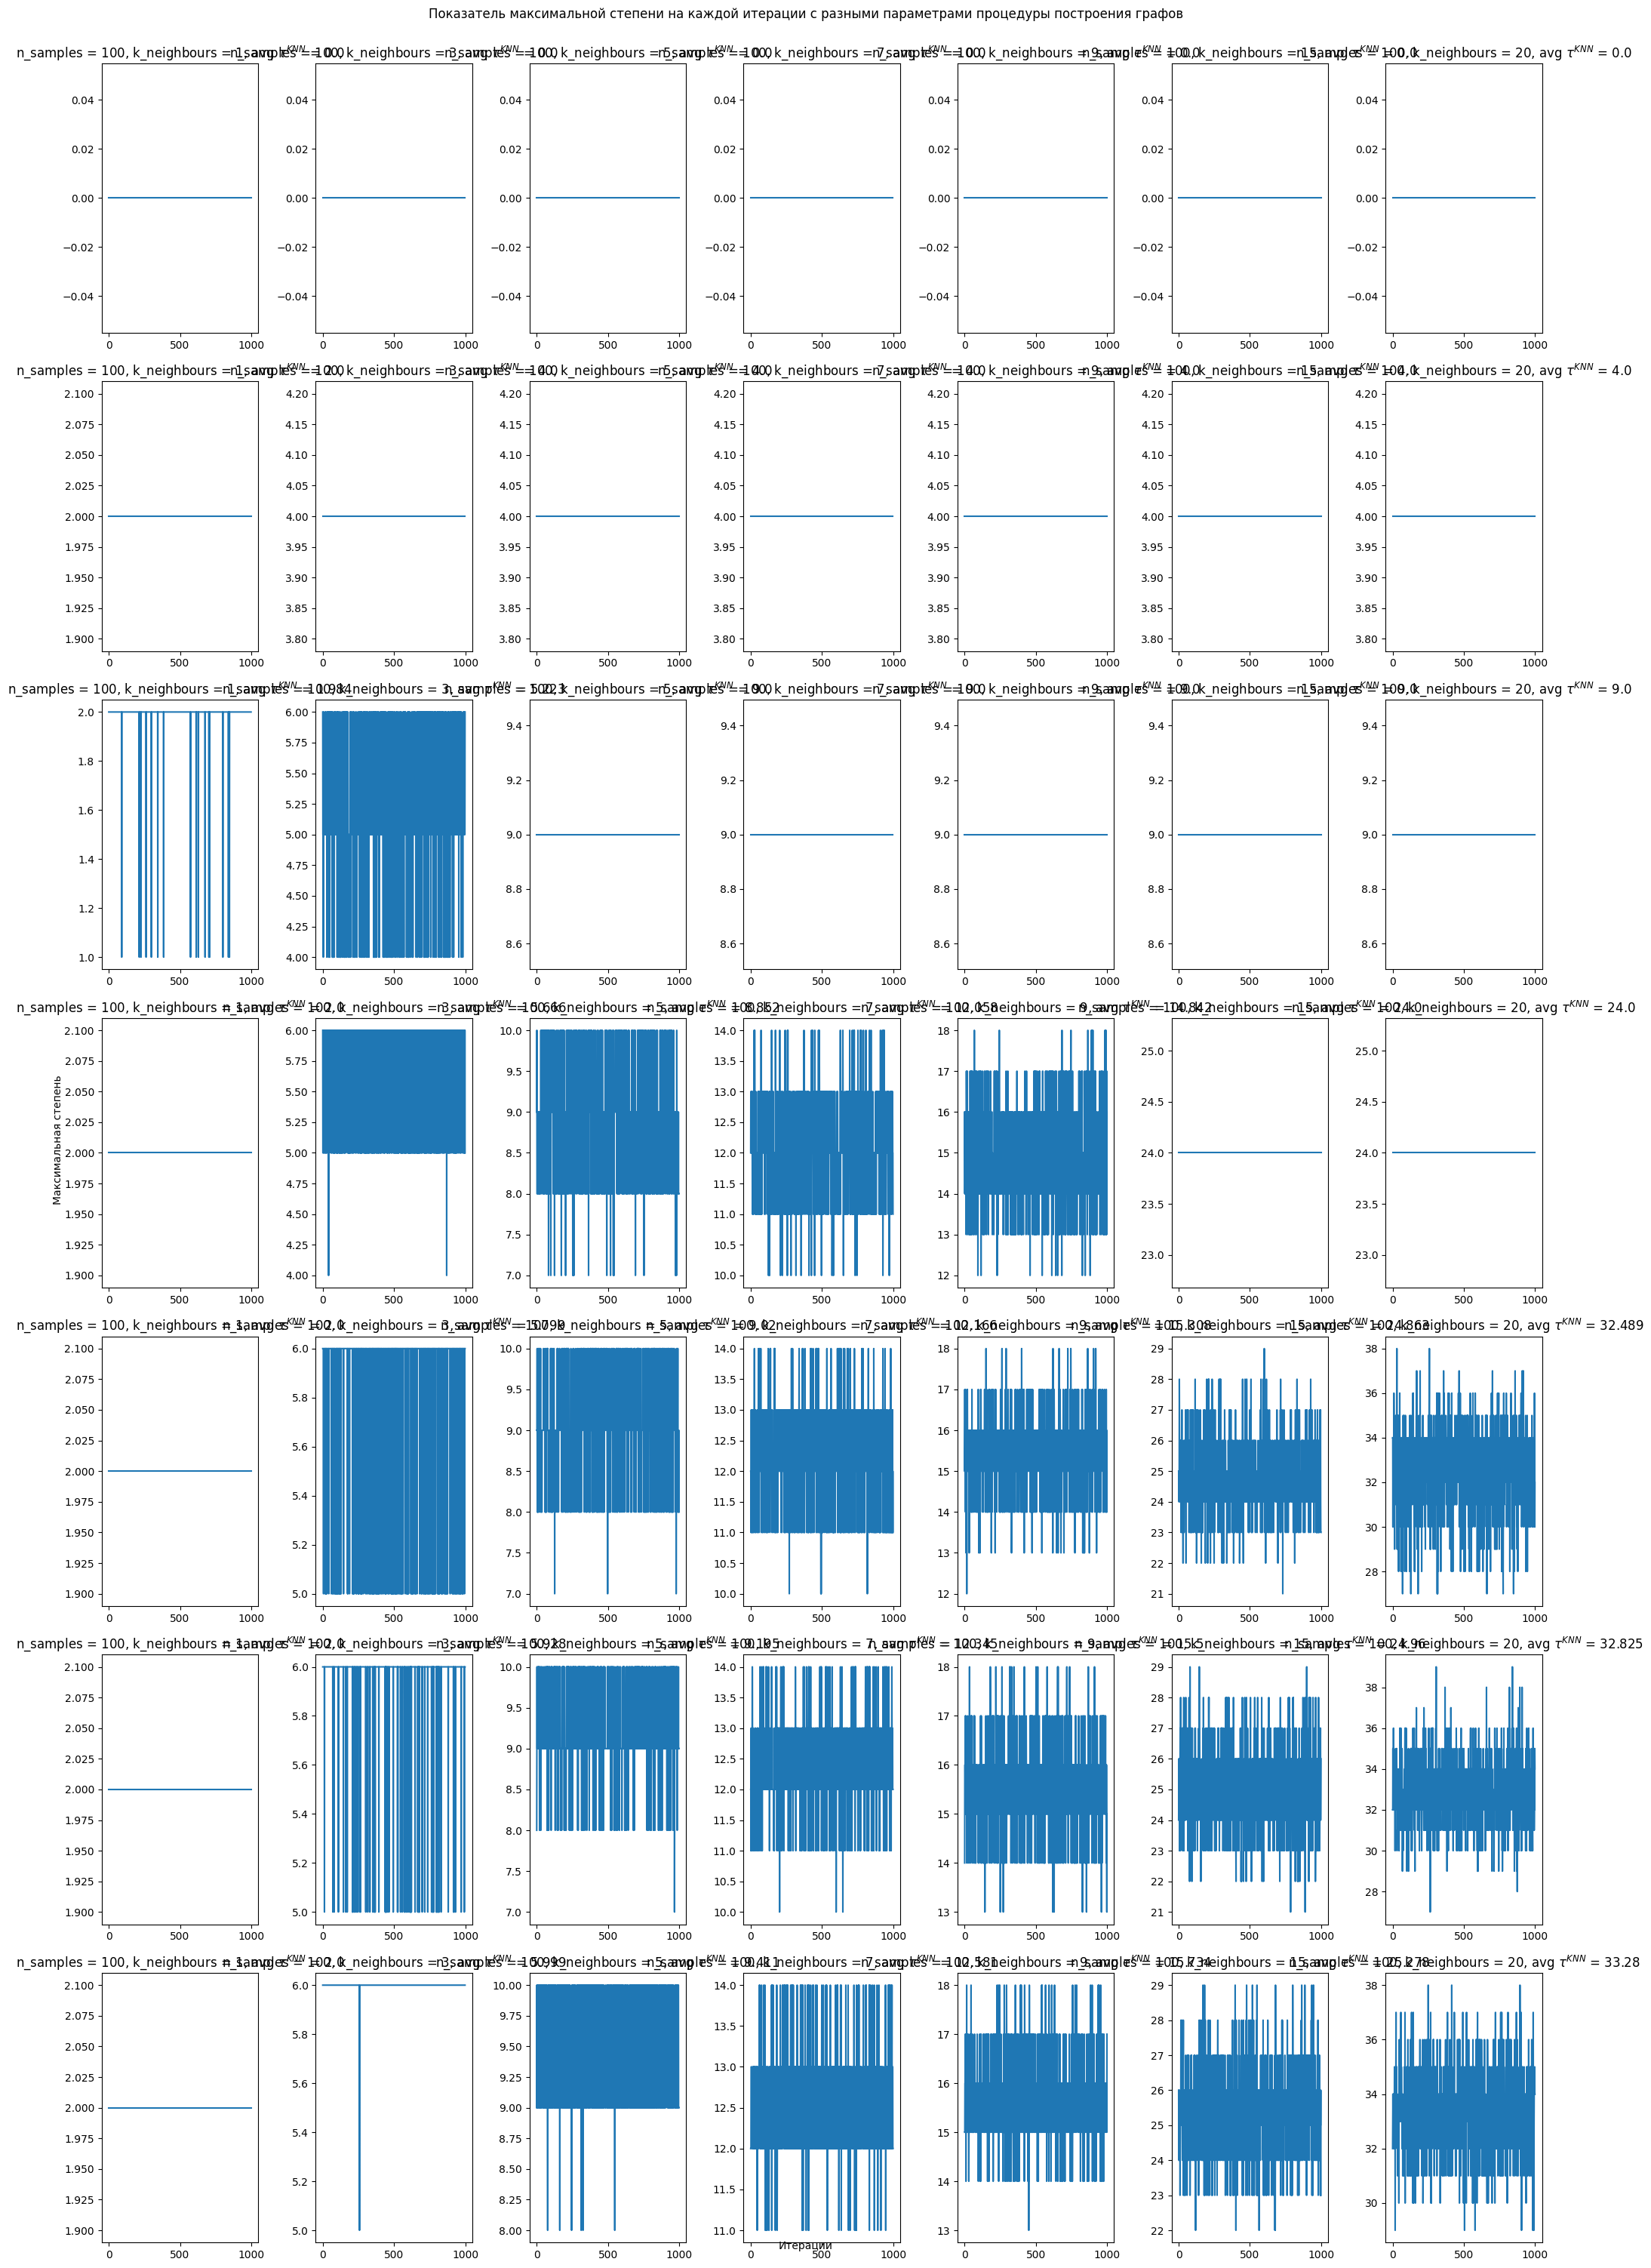

In [80]:
figure, axis = plt.subplots(nrows=len(n_samples), ncols=len(k_neighbours), figsize=(20, 30))
avg_max_degs = []

for i, n_sample in enumerate(tqdm(n_samples)):
    for j, k in enumerate(tqdm(k_neighbours)):
        max_degs = []
        
        for _ in range(N):
            distribution = skewnormal_distribution(1, n_sample)
            graph = build_knn_graph(distribution, k)
            max_deg = calculate_max_deg(graph)
            
            max_degs.append(max_deg)
    
        avg_max_deg = sum(max_degs) / N
        avg_max_degs.append(avg_max_deg)
    
        axis[i][j].plot(list(range(N)), max_degs)
        axis[i][j].set_title(f"n_samples = {n}, k_neighbours = {k}, avg $\\tau^{{KNN}}$ = {avg_max_deg}")

plt.suptitle("Показатель максимальной степени на каждой итерации с разными параметрами процедуры построения графов", y=1)

figure.text(0.5, 0.01, 'Итерации', ha='center')
figure.text(0.001, 0.5, 'Максимальная степень', va='center', rotation='vertical')
figure.tight_layout()

plt.show()

### 2.1.2 Распределение Normal(0, $\sigma_0$), где $\sigma_0 = 1$

100%|██████████| 7/7 [11:36<00:00, 99.55s/it] 


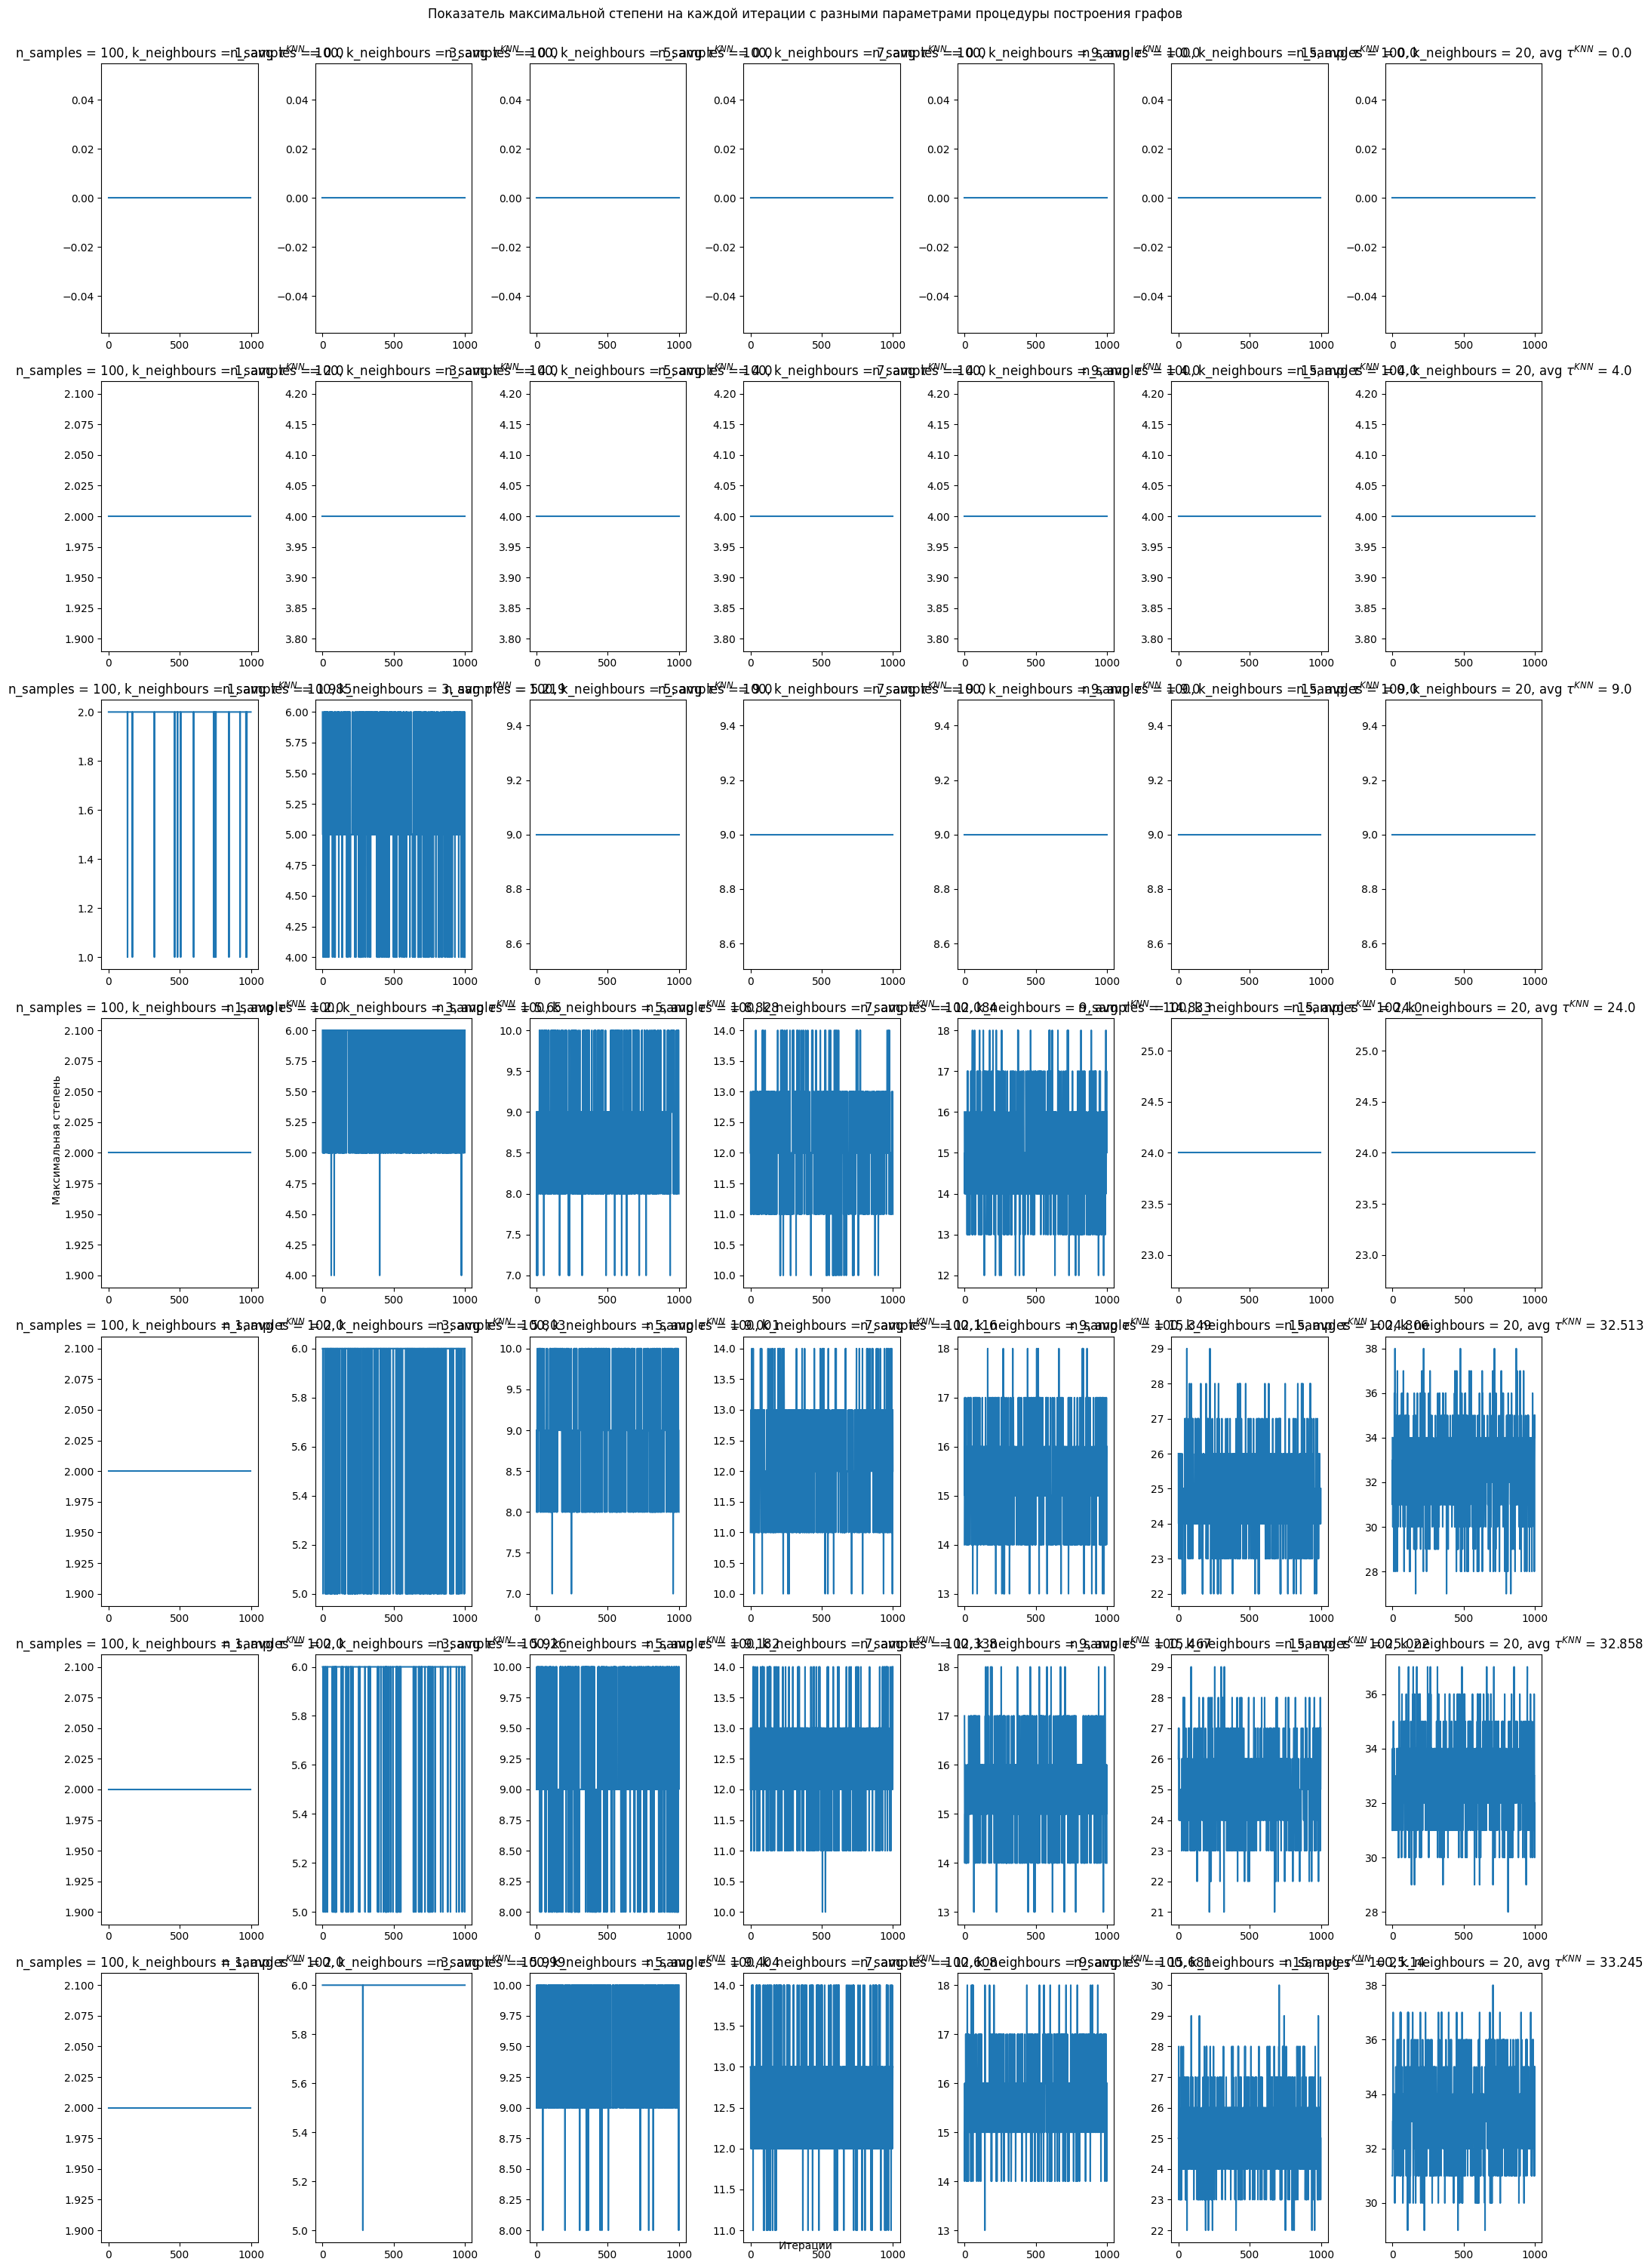

In [81]:
figure, axis = plt.subplots(nrows=len(n_samples), ncols=len(k_neighbours), figsize=(20, 30))
avg_max_degs = []

for i, n_sample in enumerate(tqdm(n_samples)):
    for j, k in enumerate(tqdm(k_neighbours)):
        max_degs = []
        
        for _ in range(N):
            distribution = normal_distribution(1, n_sample)
            graph = build_knn_graph(distribution, k)
            max_deg = calculate_max_deg(graph)
            
            max_degs.append(max_deg)
    
        avg_max_deg = sum(max_degs) / N
        avg_max_degs.append(avg_max_deg)
    
        axis[i][j].plot(list(range(N)), max_degs)
        axis[i][j].set_title(f"n_samples = {n}, k_neighbours = {k}, avg $\\tau^{{KNN}}$ = {avg_max_deg}")

plt.suptitle("Показатель максимальной степени на каждой итерации с разными параметрами процедуры построения графов", y=1)

figure.text(0.5, 0.01, 'Итерации', ha='center')
figure.text(0.001, 0.5, 'Максимальная степень', va='center', rotation='vertical')
figure.tight_layout()

plt.show()

### 2.2 Исследование характеристики $\alpha(G)$ на $\tau^{dist}$ с фиксированными параметрами распределения

In [87]:
n_samples = [1, 5, 10, 25, 50, 100]
dists = [0.001, 0.01, 0.1, 0.5, 1, 3, 5]
N = 1000

### 2.2.1 Распределение SkewNoraml($\alpha_0$), где $\alpha_0 = 1$

100%|██████████| 6/6 [01:19<00:00, 13.33s/it]


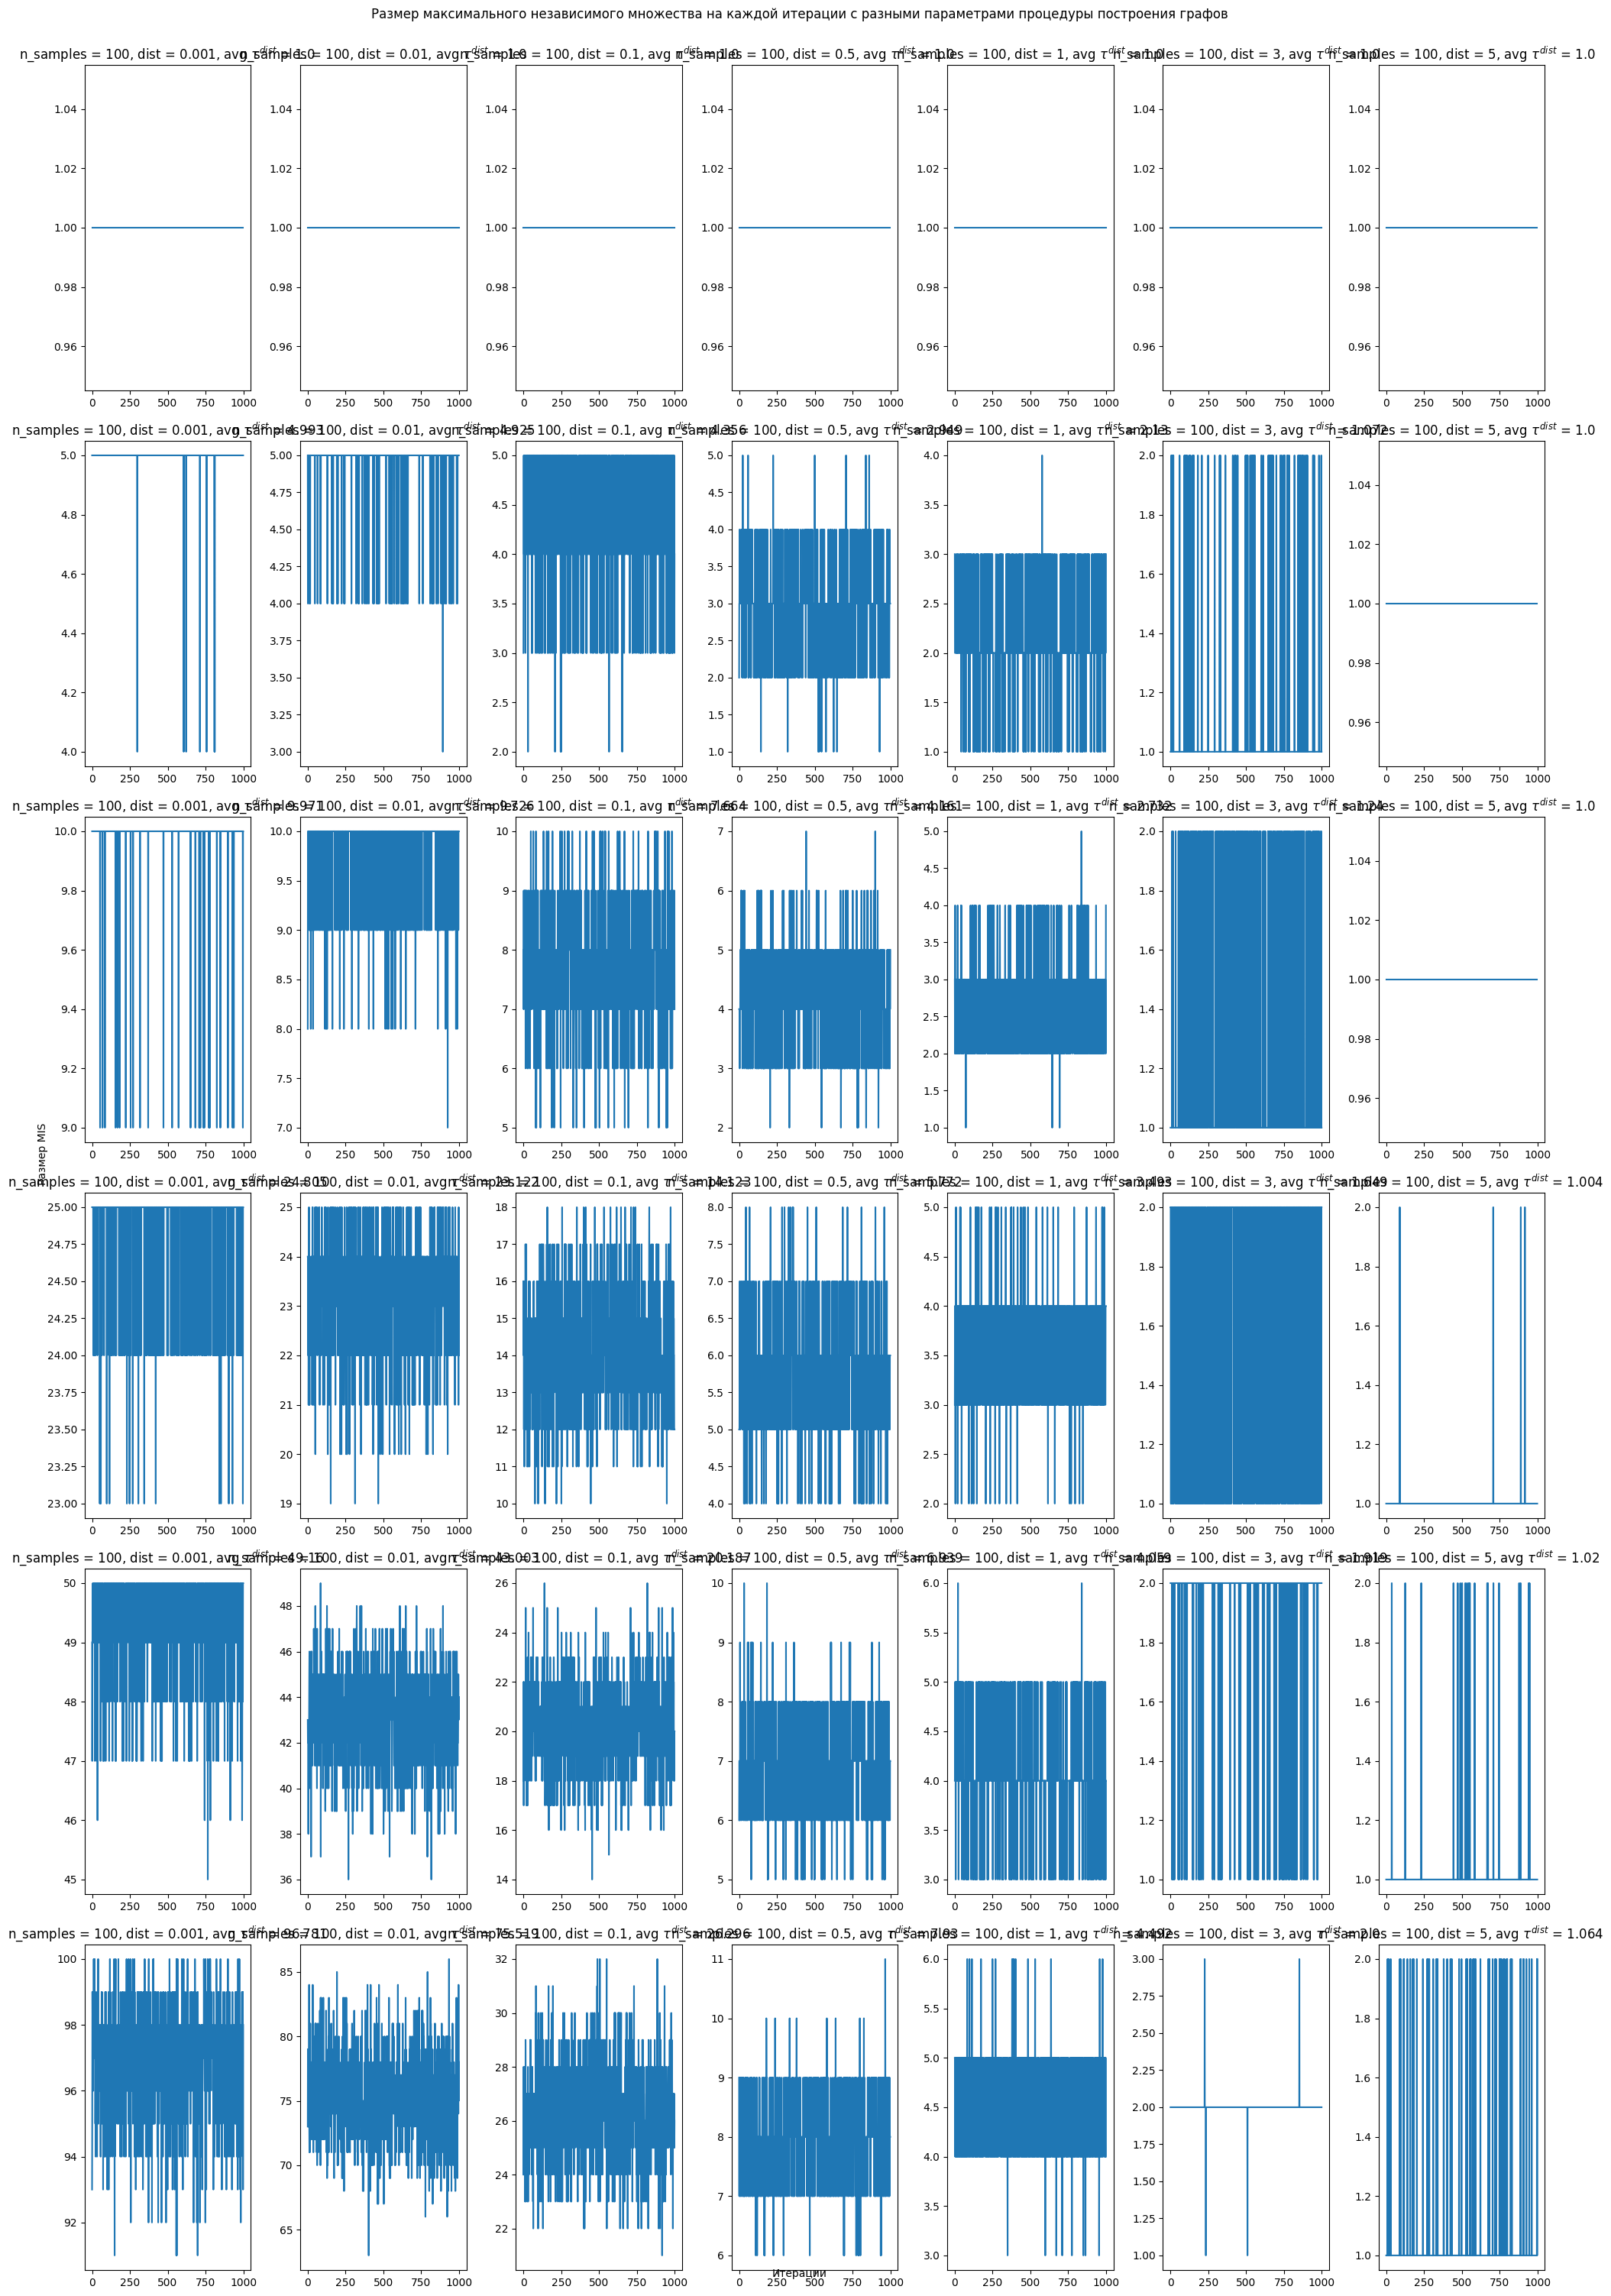

In [88]:
figure, axis = plt.subplots(nrows=len(n_samples), ncols=len(dists), figsize=(20, 30))
avg_mis_sizes = []

for i, n_sample in enumerate(tqdm(n_samples)):
    for j, dist in enumerate(tqdm(dists)):
        mis_sizes = []
        
        for _ in range(N):
            distribution = skewnormal_distribution(1, n_sample)
            graph = build_dist_graph(distribution, dist)
            mis_size = calculate_size_mis(graph)
            
            mis_sizes.append(mis_size)
    
        avg_mis_size = sum(mis_sizes) / N
        avg_mis_sizes.append(avg_mis_size)
    
        axis[i][j].plot(list(range(N)), mis_sizes)
        axis[i][j].set_title(f"n_samples = {n}, dist = {dist}, avg $\\tau^{{dist}}$ = {avg_mis_size}")

plt.suptitle("Размер максимального независимого множества на каждой итерации с разными параметрами процедуры построения графов", y=1)

figure.text(0.5, 0.01, 'Итерации', ha='center')
figure.text(0.001, 0.5, 'Размер MIS', va='center', rotation='vertical')
figure.tight_layout()

plt.show()

### 2.2.2 Распределение Normal(0, $\sigma_0$), где $\sigma_0 = 1$

100%|██████████| 6/6 [01:17<00:00, 12.93s/it]


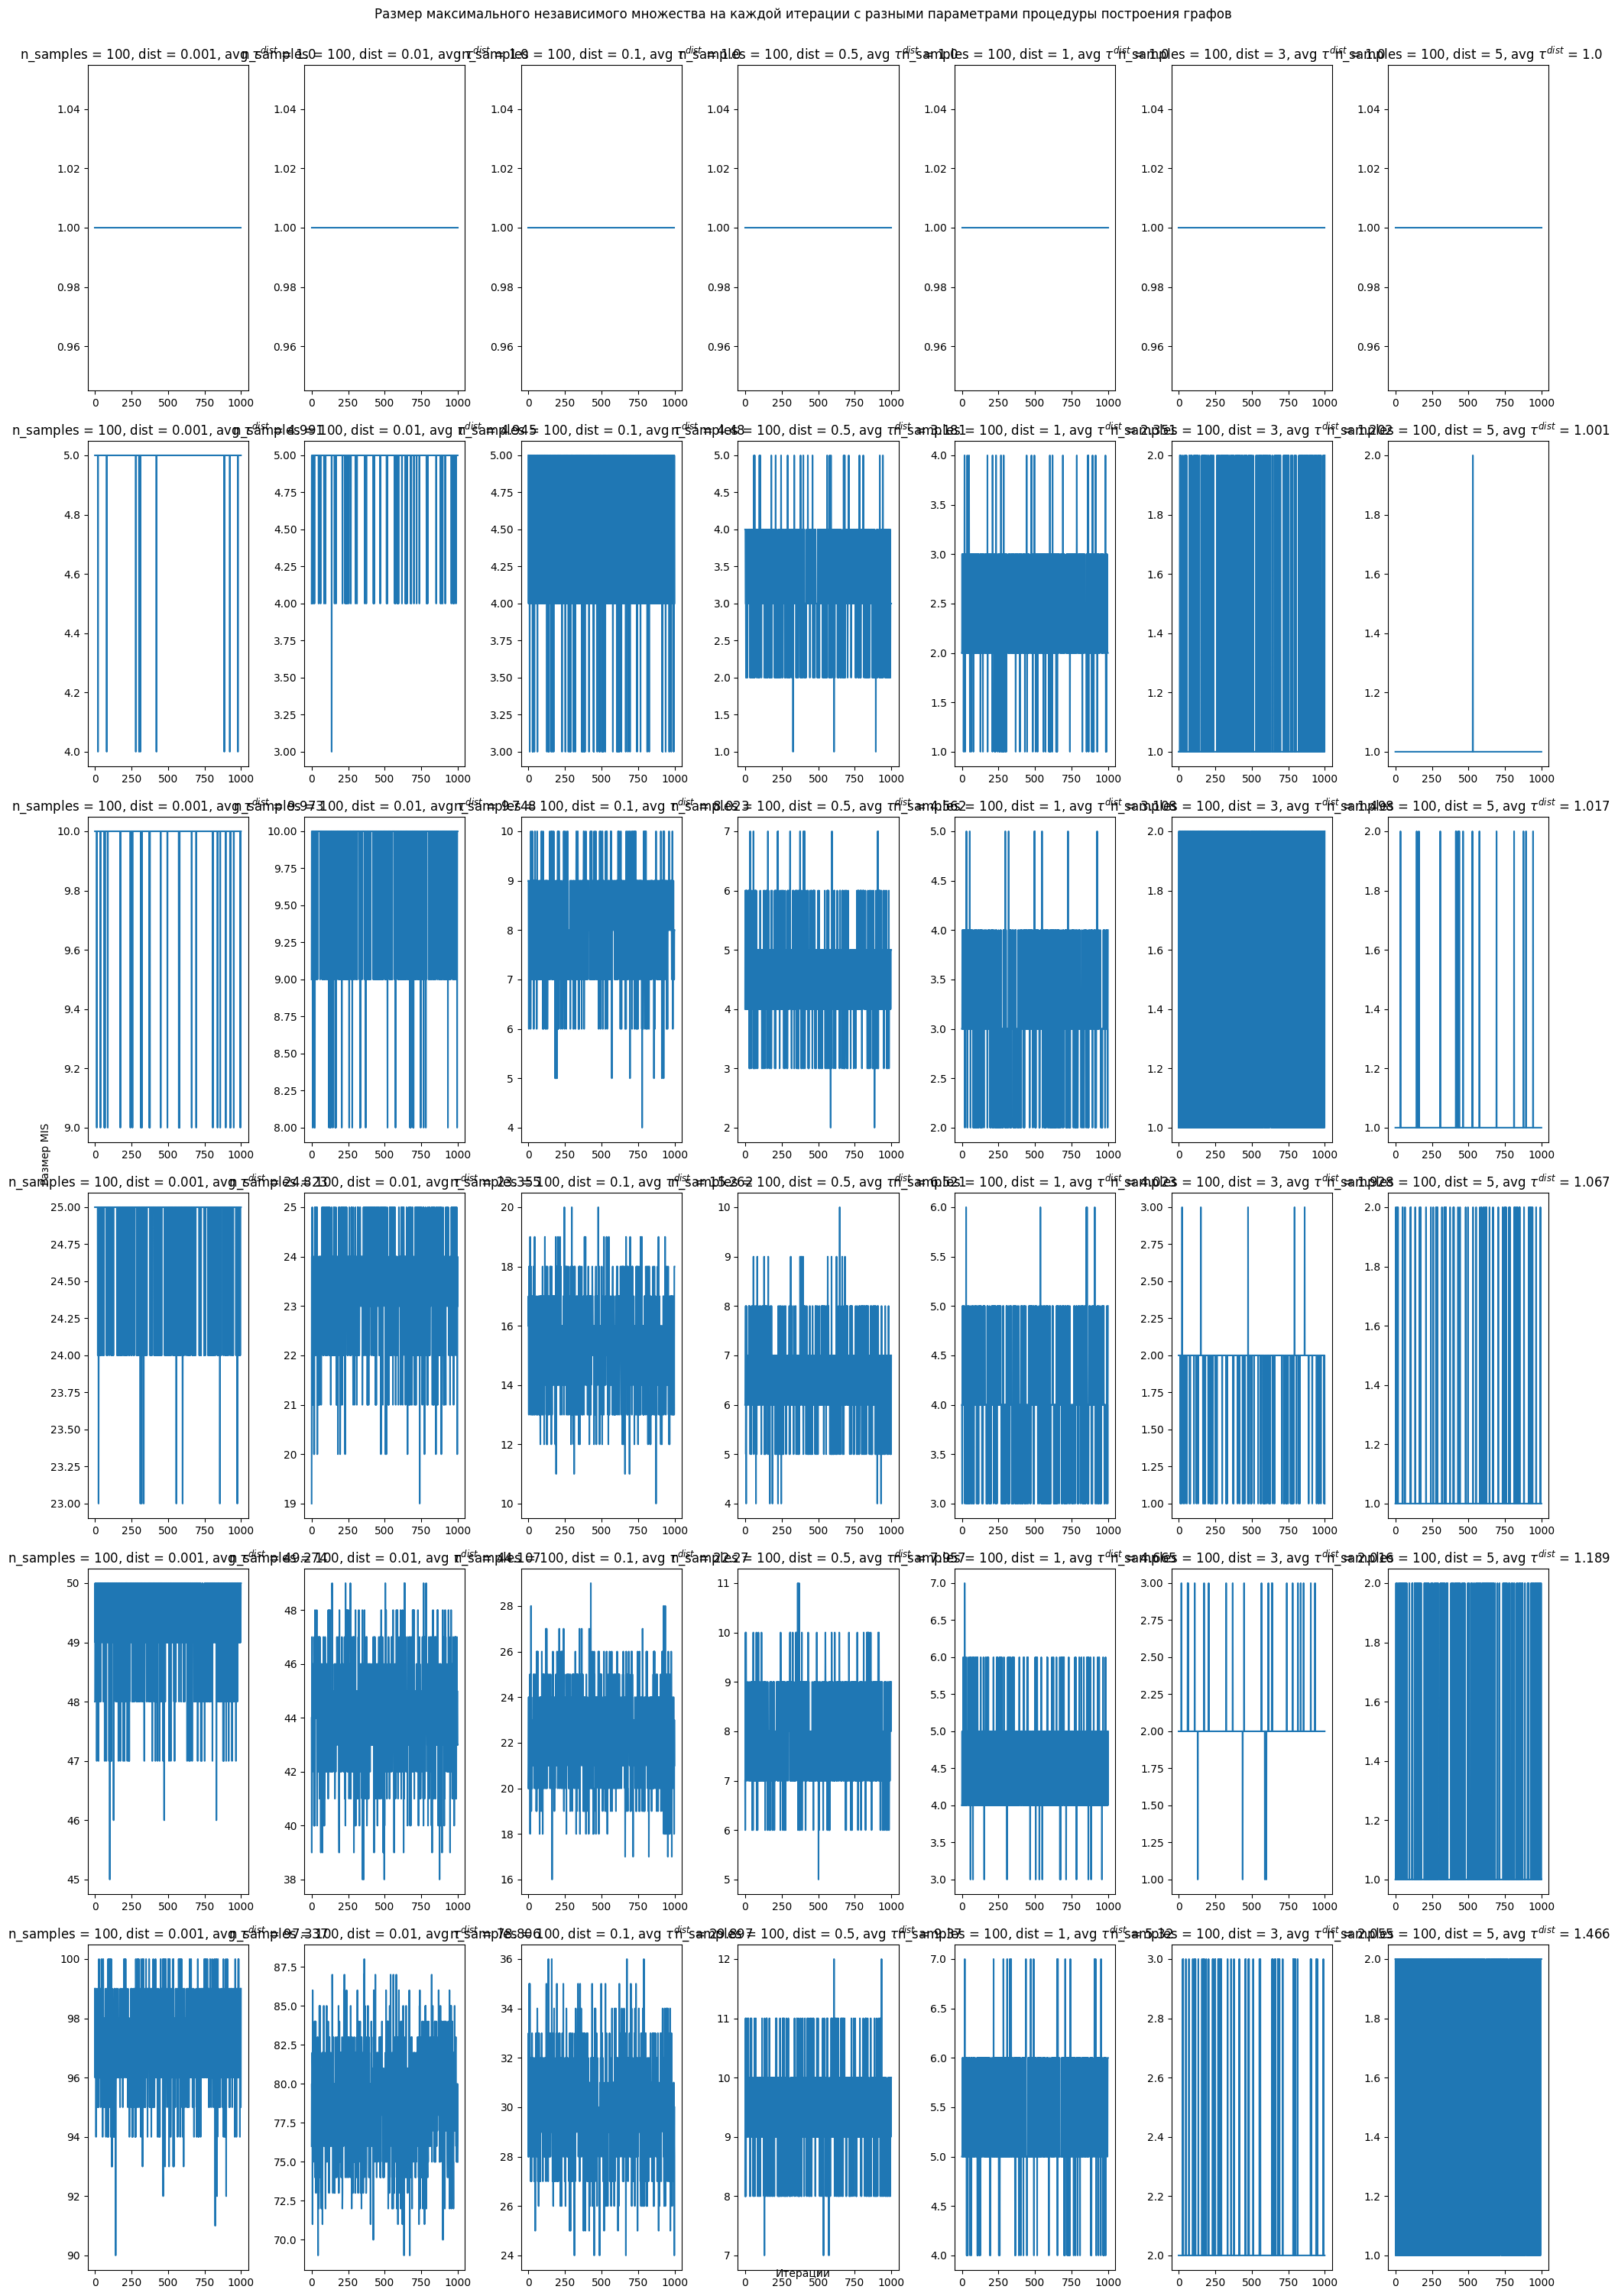

In [89]:
figure, axis = plt.subplots(nrows=len(n_samples), ncols=len(dists), figsize=(20, 30))
avg_mis_sizes = []

for i, n_sample in enumerate(tqdm(n_samples)):
    for j, dist in enumerate(tqdm(dists)):
        mis_sizes = []
        
        for _ in range(N):
            distribution = normal_distribution(1, n_sample)
            graph = build_dist_graph(distribution, dist)
            mis_size = calculate_size_mis(graph)
            
            mis_sizes.append(mis_size)
    
        avg_mis_size = sum(mis_sizes) / N
        avg_mis_sizes.append(avg_mis_size)
    
        axis[i][j].plot(list(range(N)), mis_sizes)
        axis[i][j].set_title(f"n_samples = {n}, dist = {dist}, avg $\\tau^{{dist}}$ = {avg_mis_size}")

plt.suptitle("Размер максимального независимого множества на каждой итерации с разными параметрами процедуры построения графов", y=1)

figure.text(0.5, 0.01, 'Итерации', ha='center')
figure.text(0.001, 0.5, 'Размер MIS', va='center', rotation='vertical')
figure.tight_layout()

plt.show()

## 3. Построения множества $A$ в предположении $θ$ = $θ_0$ и $υ$ = $υ_0$ при максимальной допустимой вероятности ошибки первого рода α = 0.005 и оценка мощности полученного критерия.

In [2]:
alpha, sigma = 1, 1
n_samples = 1000
sample_size = 100

In [12]:
H0_samples = generate_H(skewnormal_distribution, alpha, n_samples, sample_size)
H1_samples = generate_H(normal_distribution, sigma, n_samples, sample_size)

In [13]:
A_knn, power_knn = generate_A(H0_samples, H1_samples, calculate_max_deg, "knn", 5)

In [14]:
A_dist, power_dist = generate_A(H0_samples, H1_samples, calculate_size_mis, "dist", 1)

In [15]:
A_knn, A_dist

({8, 9, 10}, {4, 5})

In [16]:
power_knn, power_dist

(0.0, 0.336)